In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# **Summery**

Analytixlabs has been hired by one of India's leading online marketplaces to provide data-driven insights into their business performance. The client is seeking assistance in measuring, managing, and analyzing various aspects of their business, including customer, seller, product, and channel behaviors.

The available data spans from September 2016 to October 2018 and comprises several key tables:

* Customers: Contains information about the customers, likely including demographics, purchase history, and other relevant details.
- Sellers: Provides details about the sellers on the platform, such as their profiles, products offered, and performance metrics.
- Products: Includes information on the products available for sale, including attributes like category, price, and description.
- Orders: Contains data related to orders placed on the platform, including order IDs, product IDs, order status, and dates.
- Order_Items: Provides order-level information, likely including details about the items purchased within each order.
- Order_Payments: Contains information about payments made for orders, including payment methods, amounts, and dates.
- Order_Review_Ratings: Includes customer ratings and reviews at the order level, which can provide insights into customer satisfaction and product quality.
- Geo-Location: Provides location details, which could be used to analyze regional variations in customer behavior or market trends.


As an analyst for this project, the tasks would involve cleaning and processing the data as necessary before conducting analysis. The goal is to derive actionable insights to help the client make informed decisions and optimize their business operations. This could include identifying trends, understanding customer preferences, evaluating seller performance, optimizing product offerings, and enhancing the overall customer experience.

# **Business Objective**

Business Objective:

The below are few Sample business questions to be addressed as part of this analysis. However this
is not exhaustive list and you can add as many as analysis and provide insights on the same.

**Perform Detailed exploratory analysis:**

1. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Totalpayment methods etc…)
2. Understanding how many new customers acquired every month
3. Understand the retention of customers on month on month basis
4. How the revenues from existing/new customers on month on month basis
5. Understand the trends/seasonality of sales, quantity by category, location, month,
week, day, time, channel, payment method etc…
6. Popular Products by month, seller, state, category.
7. Popular categories by state, month
8. List top 10 most expensive products sorted by price

**Performing Customers/sellers Segmentation:**
1. Divide the customers into groups based on the revenue generated
2. Divide the sellers into groups based on the revenue generated
Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in
each transaction. (combination of 2 or 3 buying together)

**Payment Behaviour:**
1. How customers are paying?
2. Which payment channels are used by most customers?

**Customer satisfaction towards category & product:**
1. Which categories (top 10) are maximum rated & minimum rated?
2. Which products (top10) are maximum rated & minimum rated?
3. Average rating by location, seller, product, category, month etc.
Etc..

In [2]:
# Imporing data

customers_data = pd.read_csv('/content/drive/MyDrive/DataSets/Marketing Analysis/CUSTOMERS.csv')

geo_location_data = pd.read_csv('/content/drive/MyDrive/DataSets/Marketing Analysis/GEO_LOCATION.csv')

orders_data = pd.read_csv('/content/drive/MyDrive/DataSets/Marketing Analysis/ORDERS.csv')

order_items_data = pd.read_csv('/content/drive/MyDrive/DataSets/Marketing Analysis/ORDER_ITEMS.csv')

order_payment_data = pd.read_csv('/content/drive/MyDrive/DataSets/Marketing Analysis/ORDER_PAYMENTS.csv')

order_review_data = pd.read_csv('/content/drive/MyDrive/DataSets/Marketing Analysis/ORDER_REVIEW_RATINGS.csv')

product_data = pd.read_csv('/content/drive/MyDrive/DataSets/Marketing Analysis/PRODUCTS.csv')

sellers_data = pd.read_csv('/content/drive/MyDrive/DataSets/Marketing Analysis/SELLERS.csv')

## **Now will go throgh each of CSV and perform EDA for same**

In [3]:
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [120]:
customers_data.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**No any null values and duplicte calues present in the customers_data dataset.**

**EDA on customers_data**

Chart 1: **Customer distribution over states**



<ipython-input-121-7bcd45ee4686>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='customer_state',data = customers_data,palette=palette)


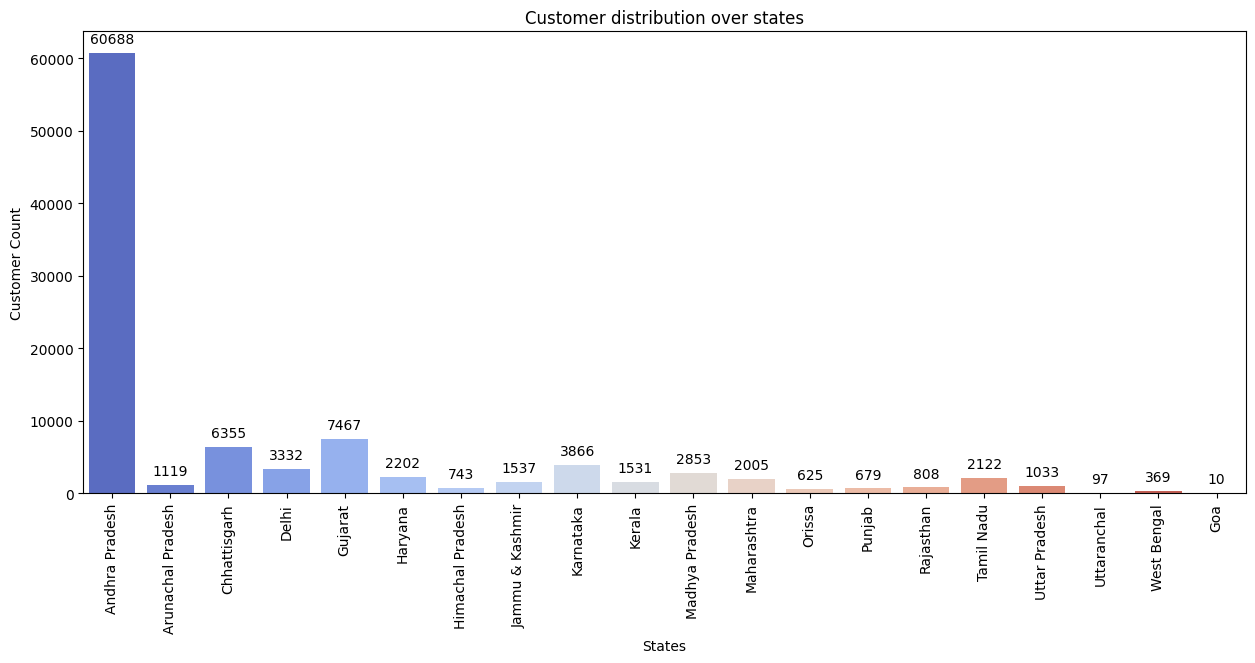

In [121]:
states_counts = customers_data['customer_state'].value_counts()

states_counts.reset_index()

plt.figure(figsize=(15,6))
palette = "coolwarm"
ax = sns.countplot(x='customer_state',data = customers_data,palette=palette)

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.xlabel('States')
plt.ylabel('Customer Count')
plt.title('Customer distribution over states')
plt.xticks(rotation=90)

plt.show()

**Insights from above chart:**
- **Andhra Pradesh** has the highest number of customers, indicating a large customer base in that region.**Gujarat, Chhattisgarh, and Karnataka** also have significant customer counts, suggesting a substantial market presence in these states.
- States with relatively lower customer counts, such as **Jammu & Kashmir, Kerala, and Arunachal Pradesh**, might present growth opportunities for expanding the customer base through targeted marketing strategies or localized offerings.**Uttaranchal and Goa** have very low customer counts, indicating potential untapped markets or areas where the platform might need to focus more attention to attract customers.

**Chart 2: Customer Count Distribution Across Cities in Each State**

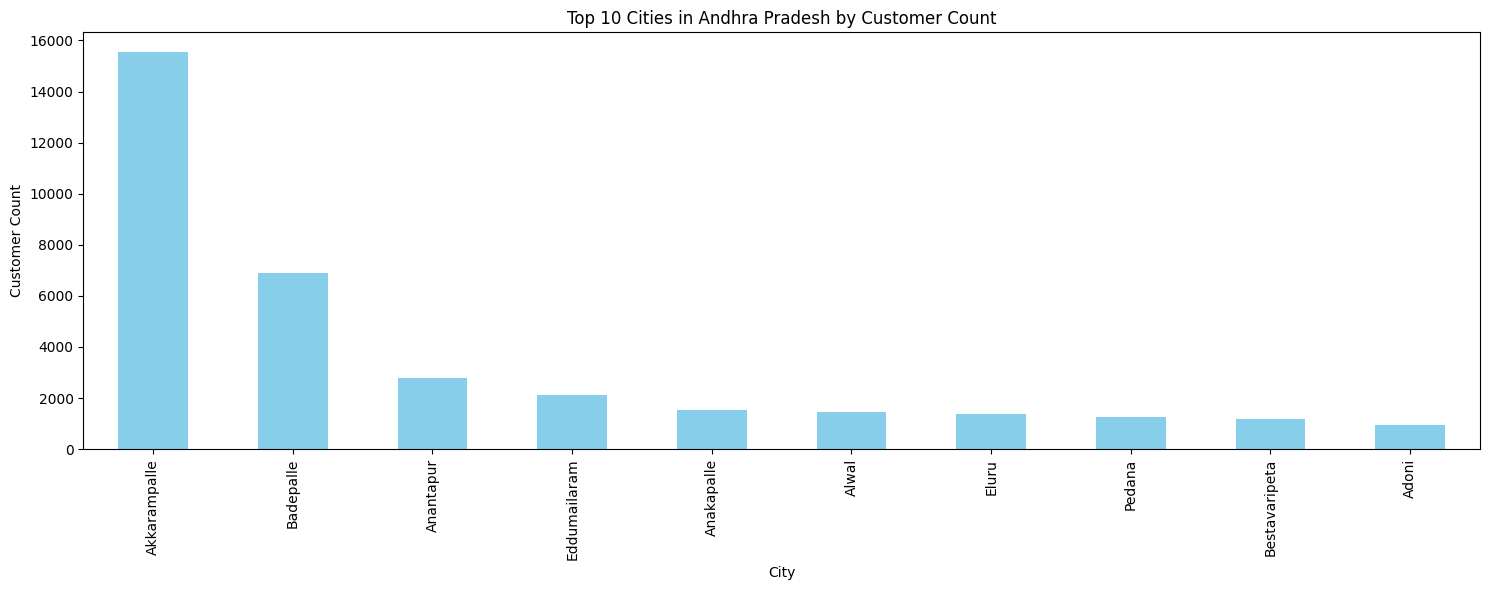

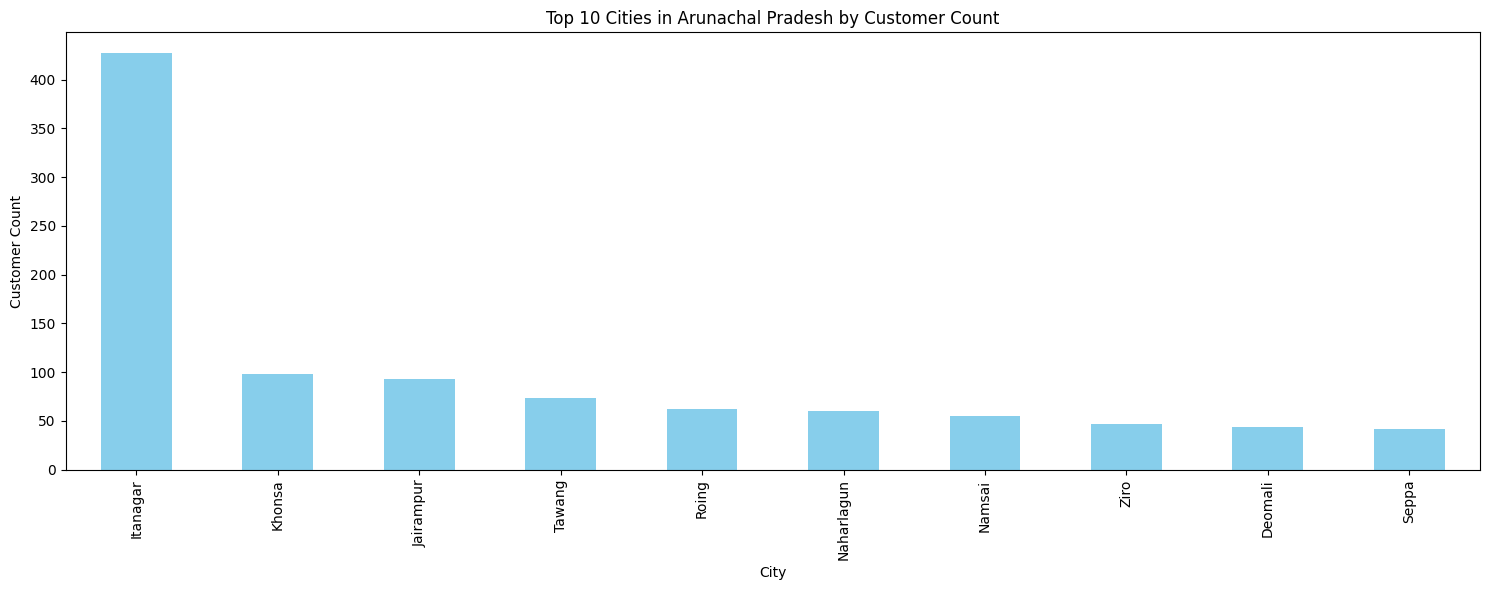

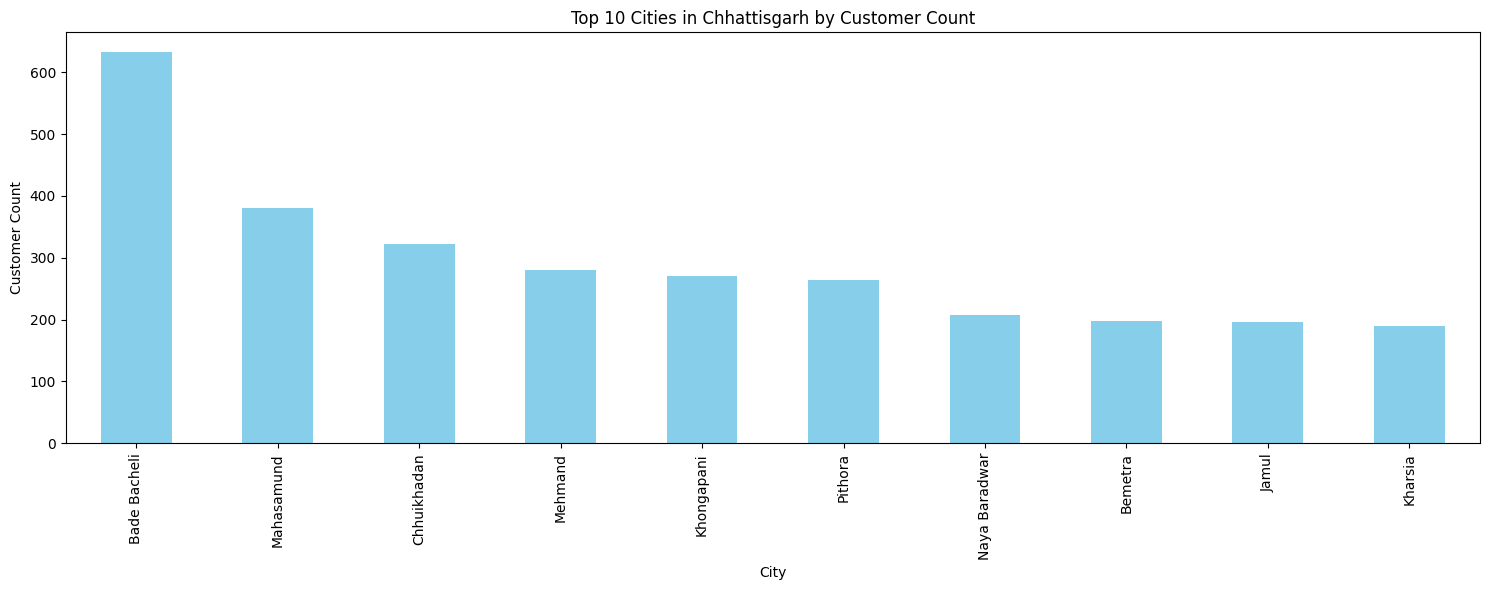

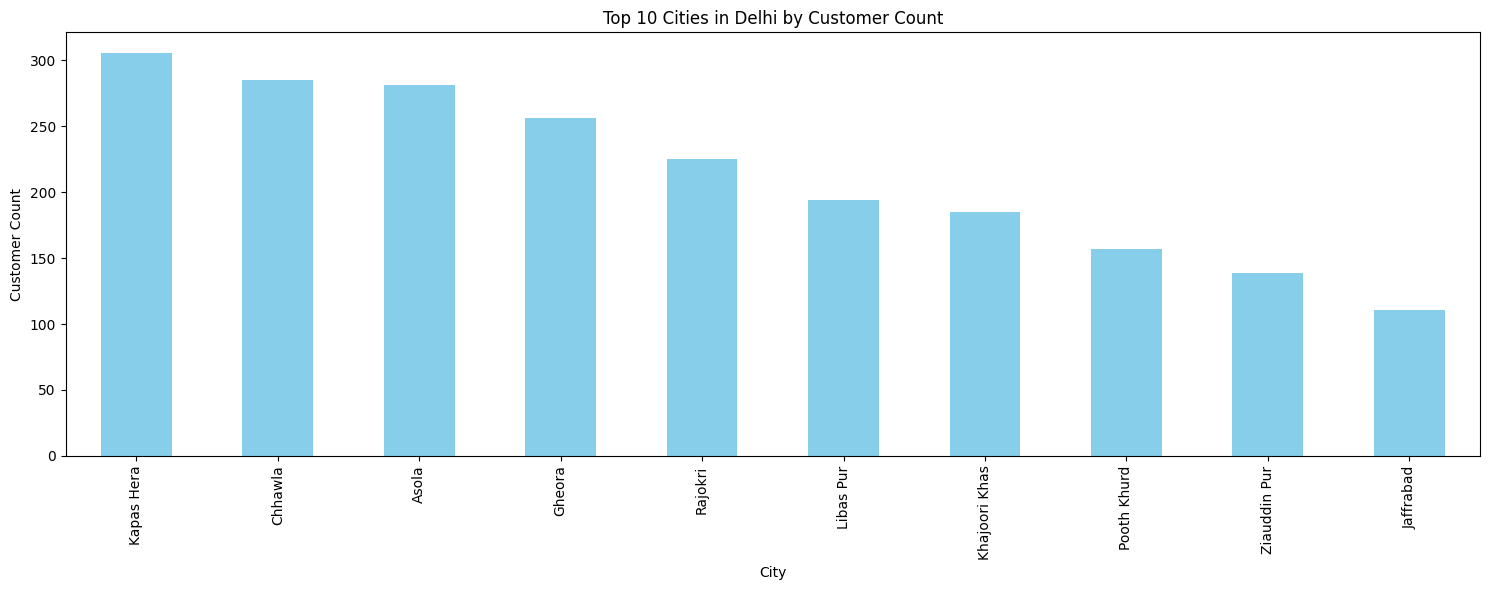

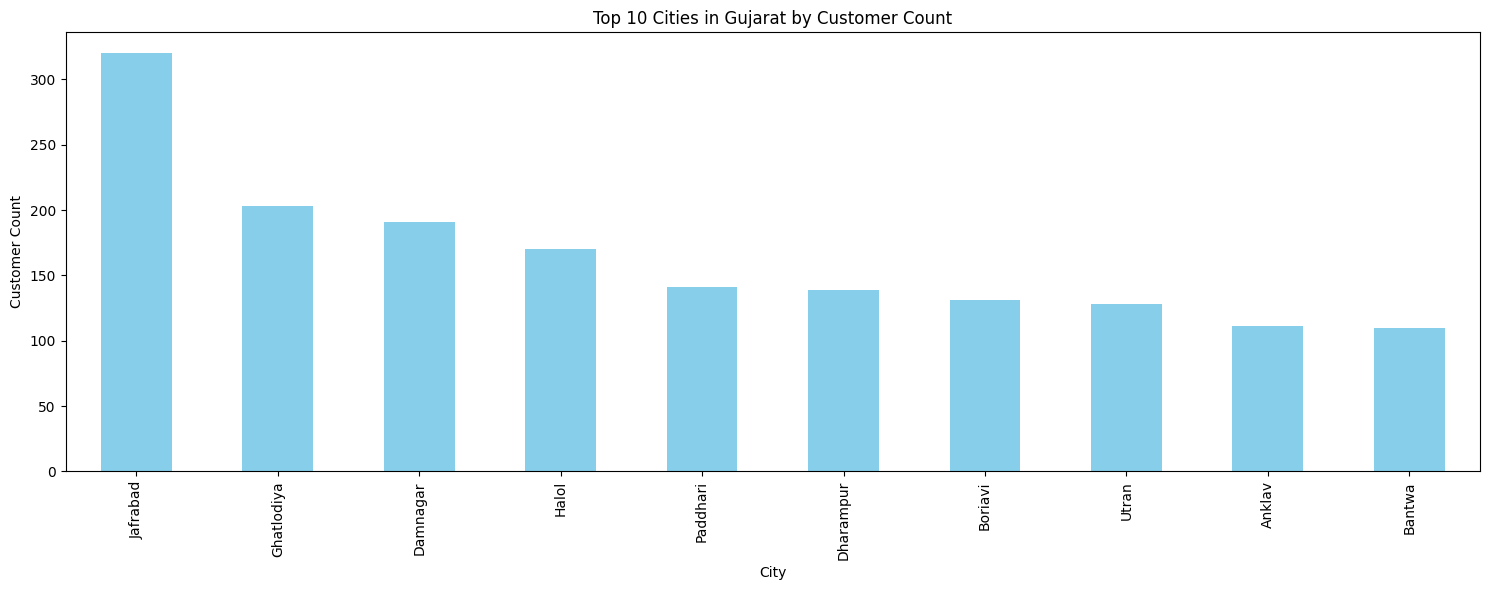

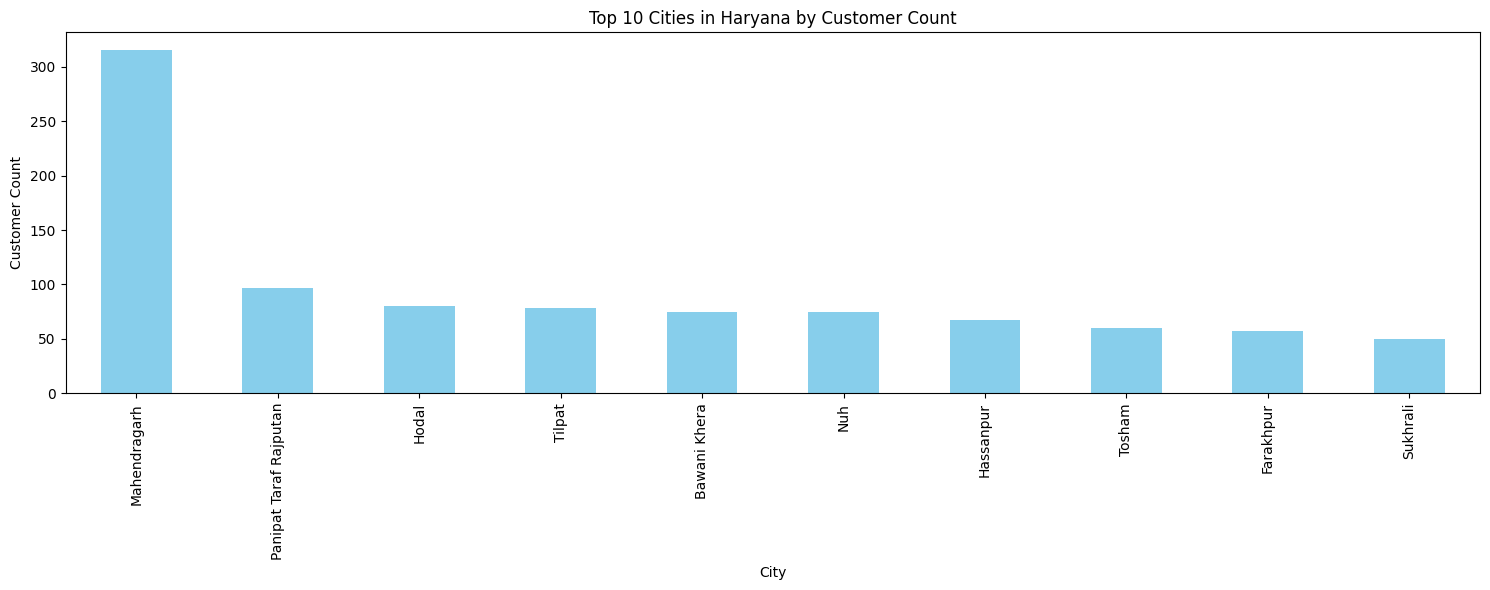

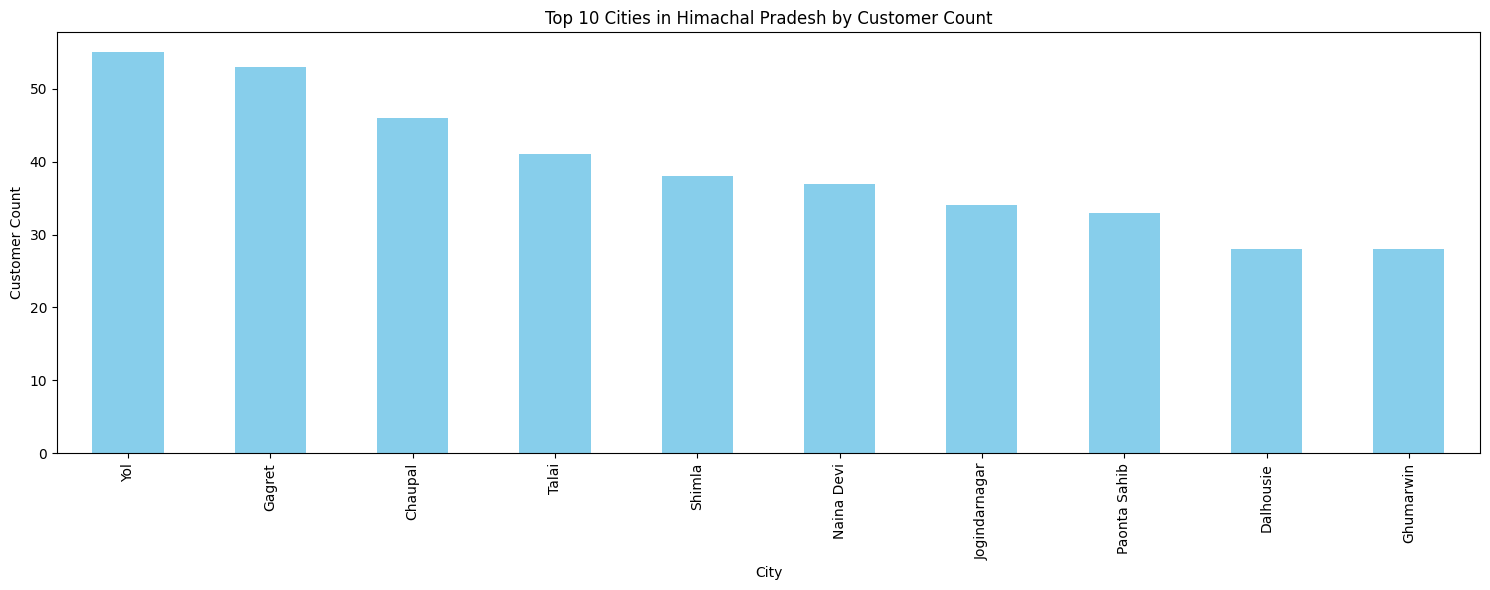

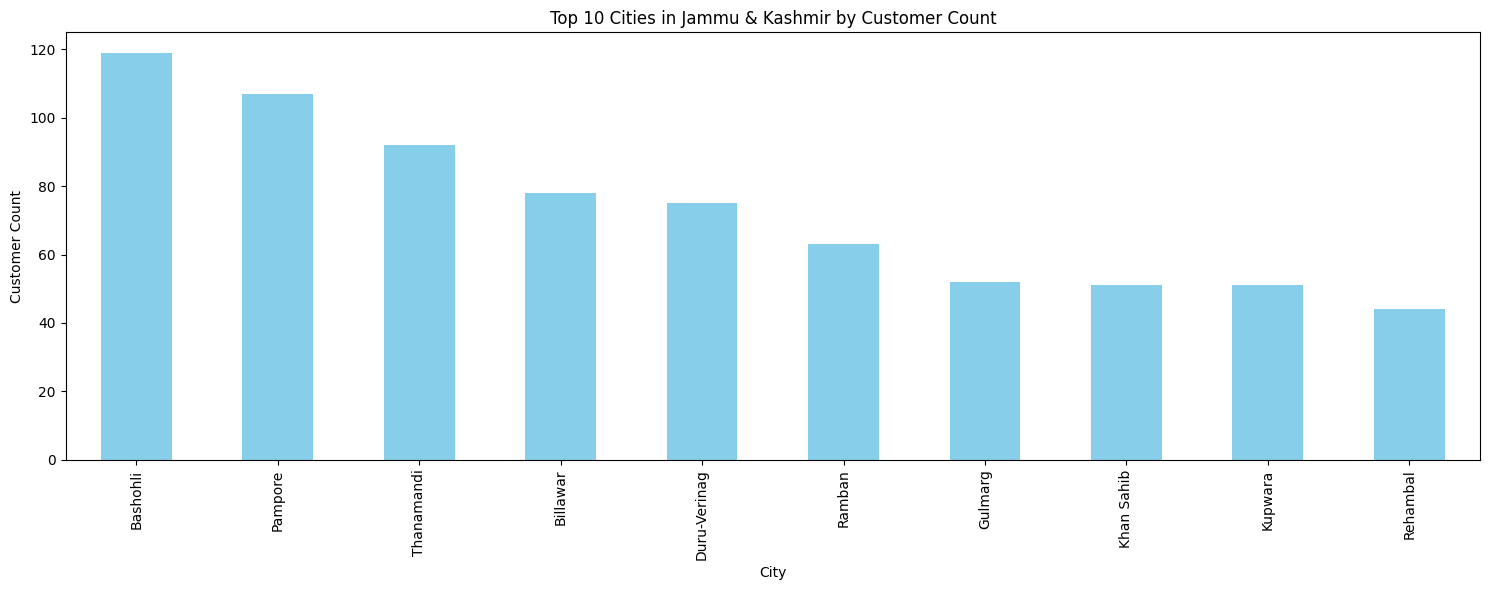

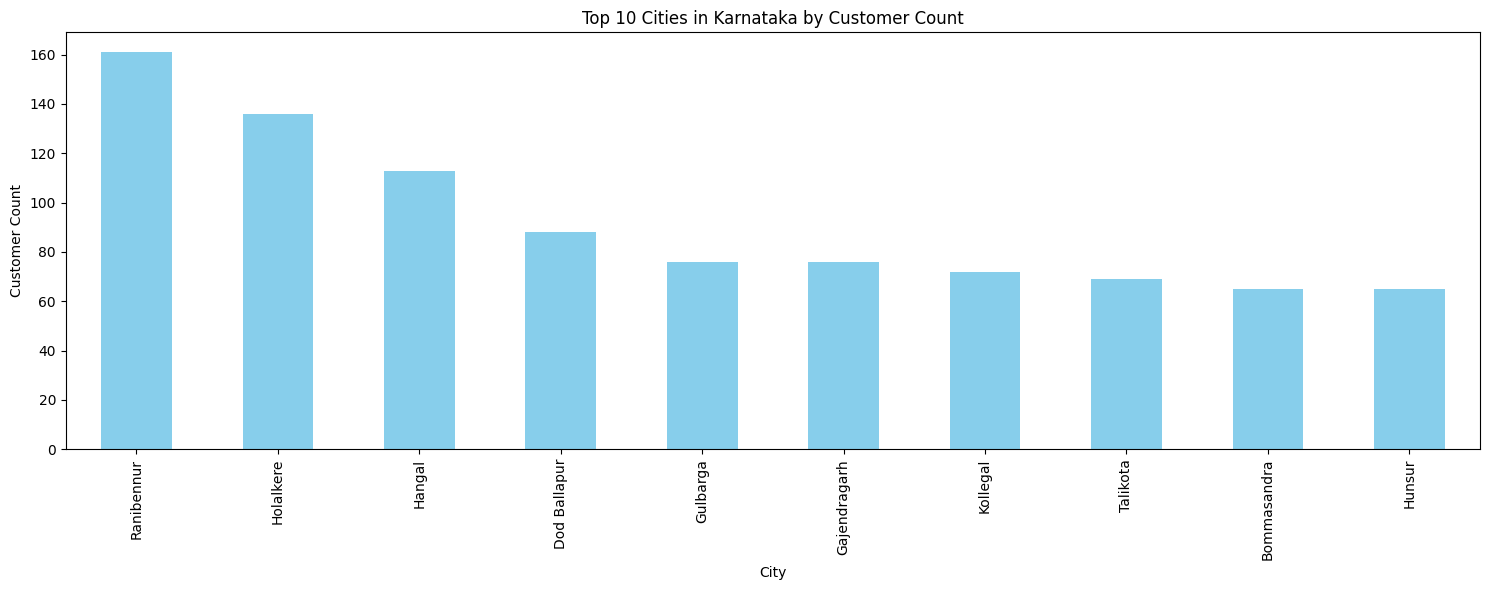

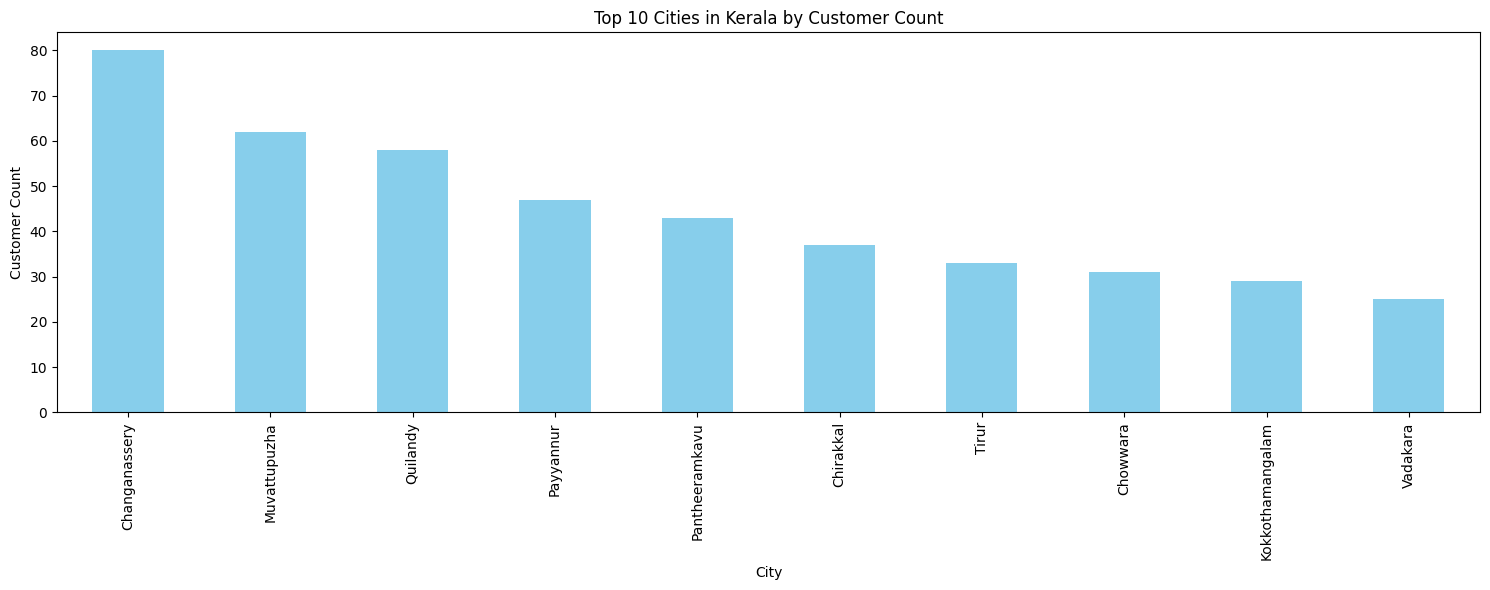

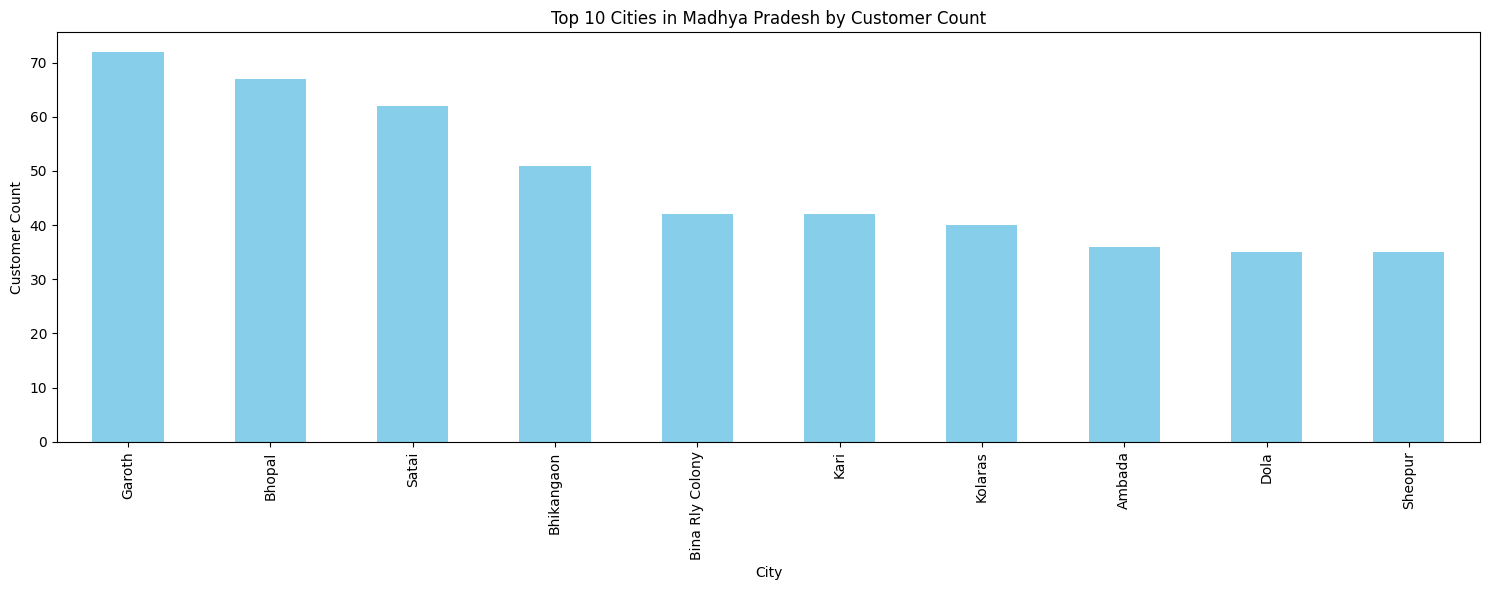

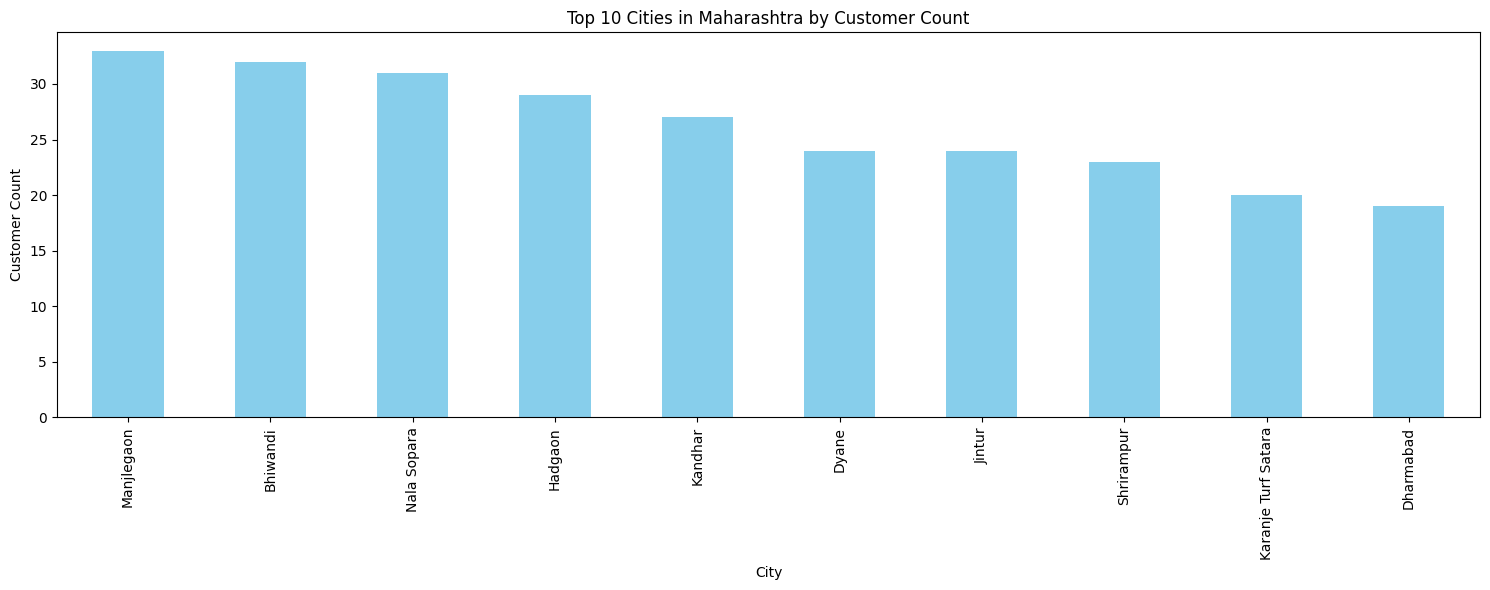

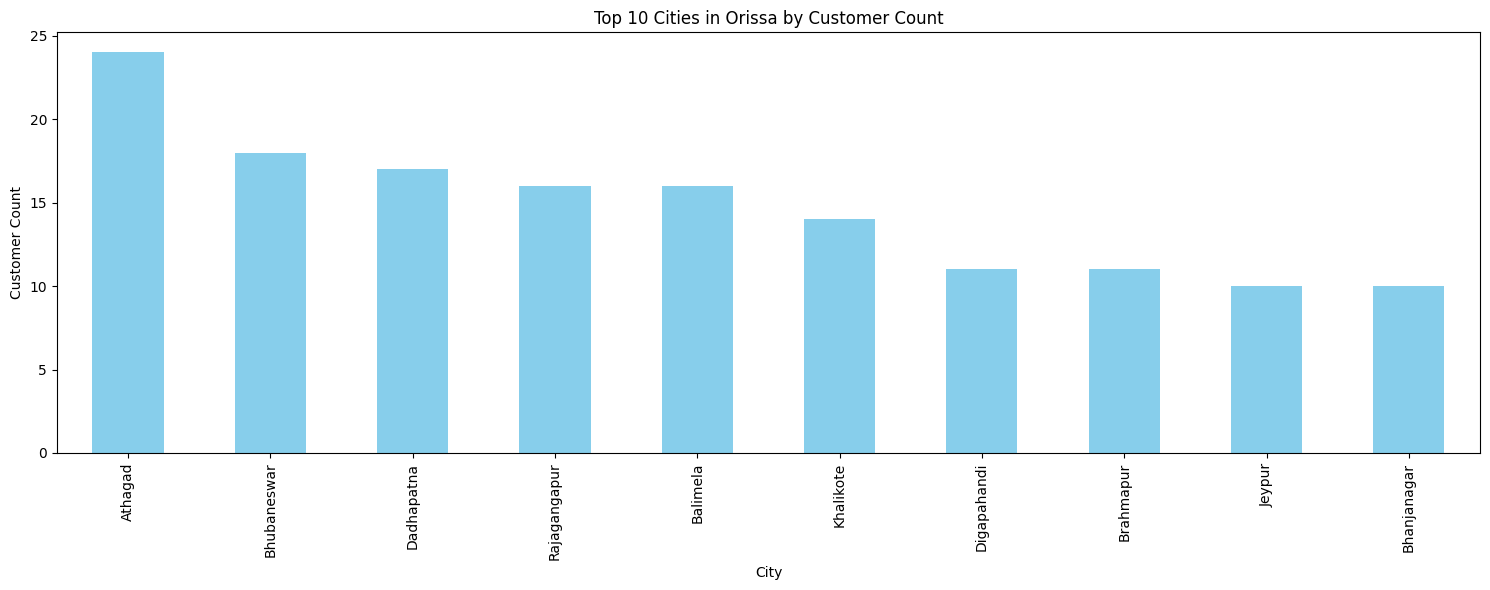

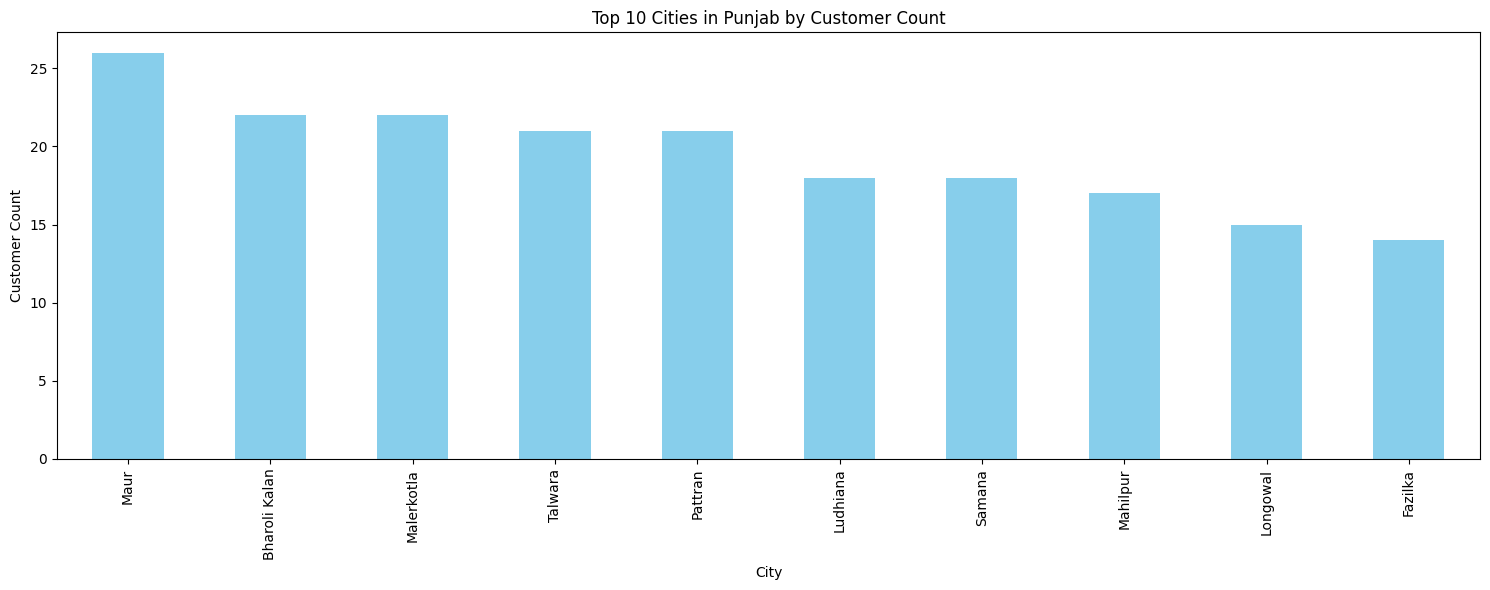

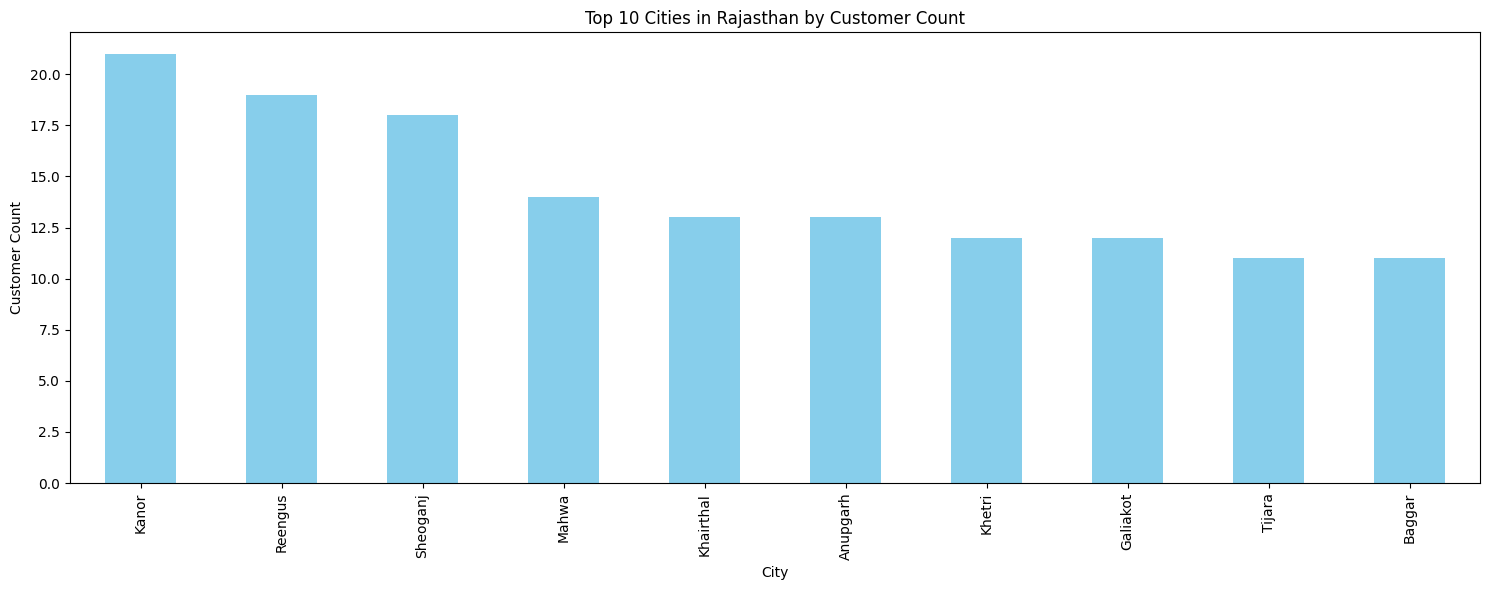

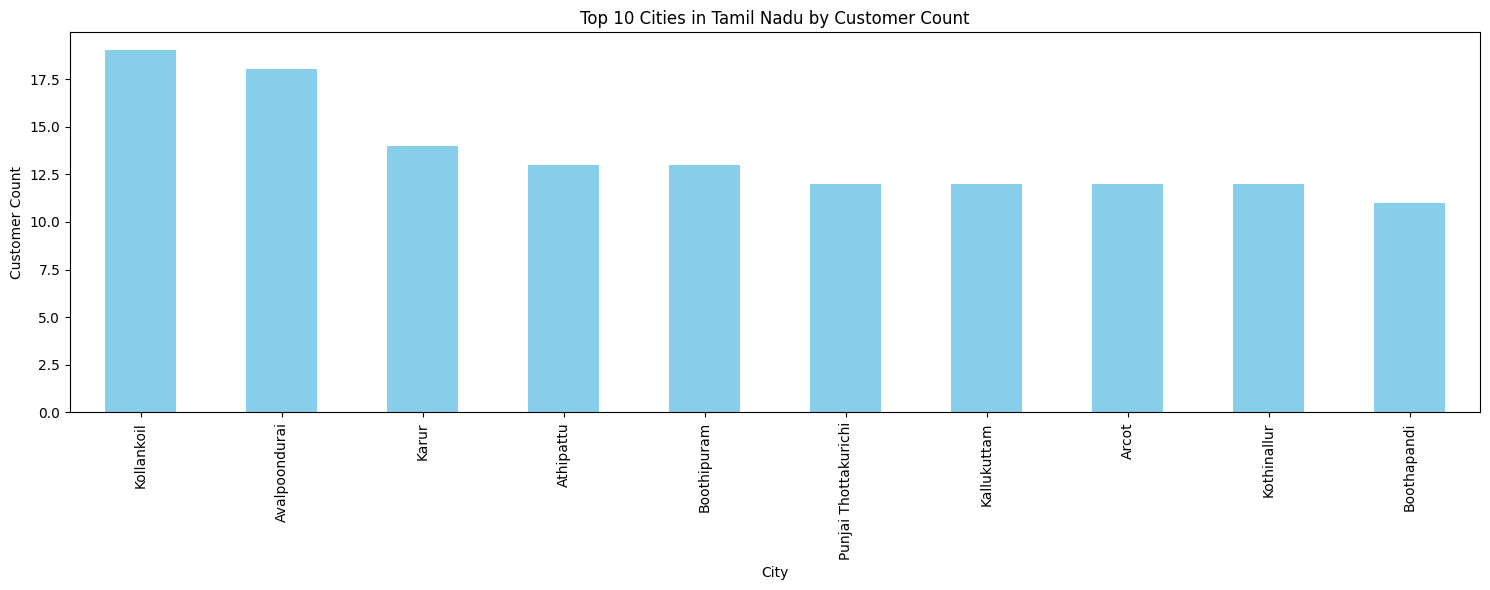

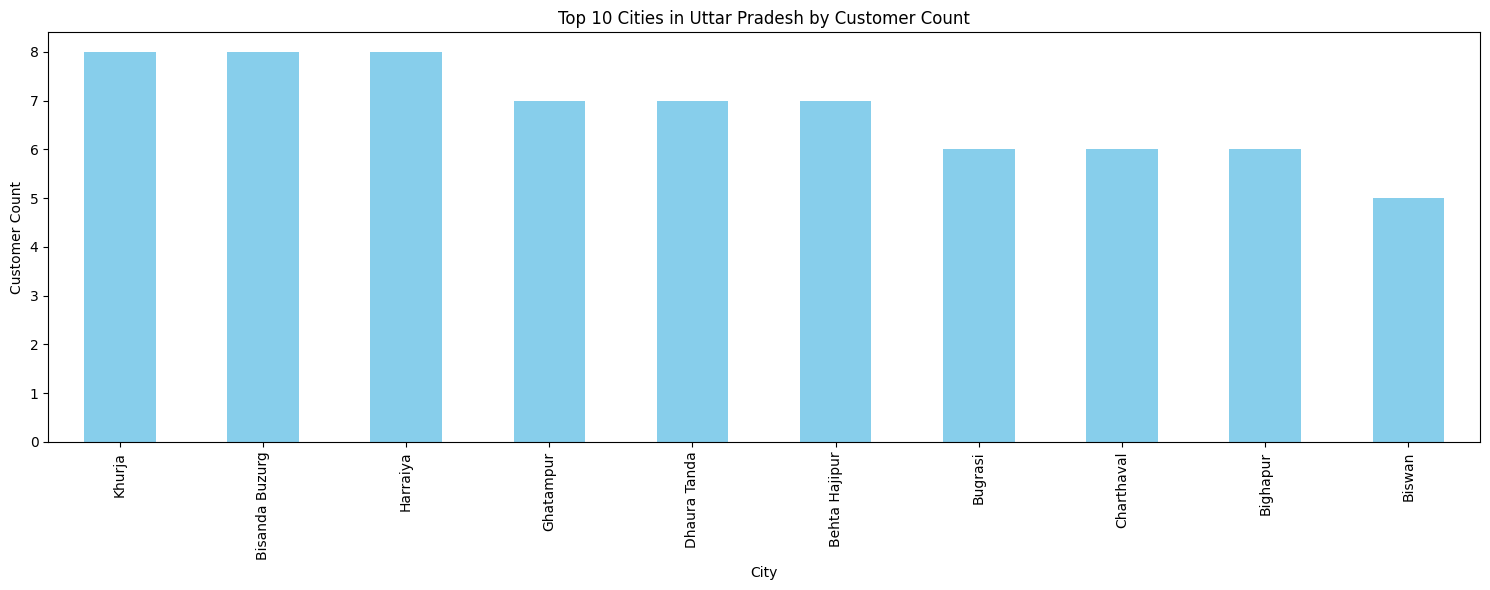

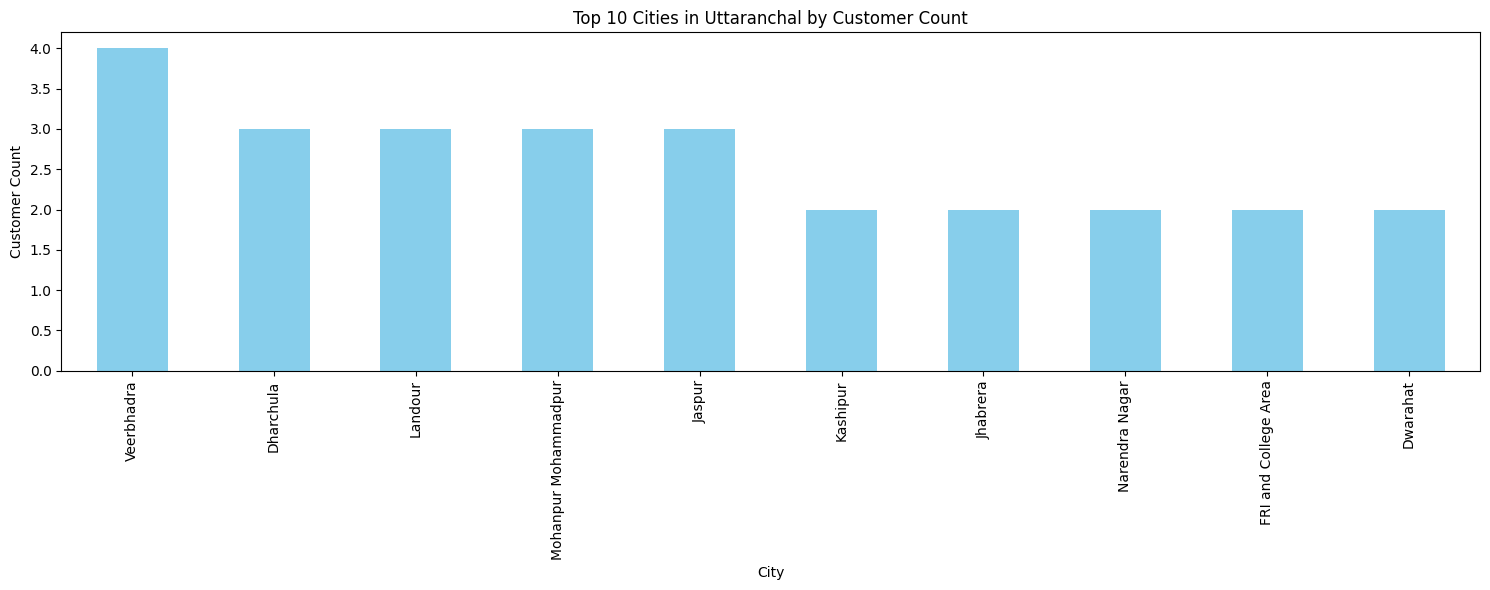

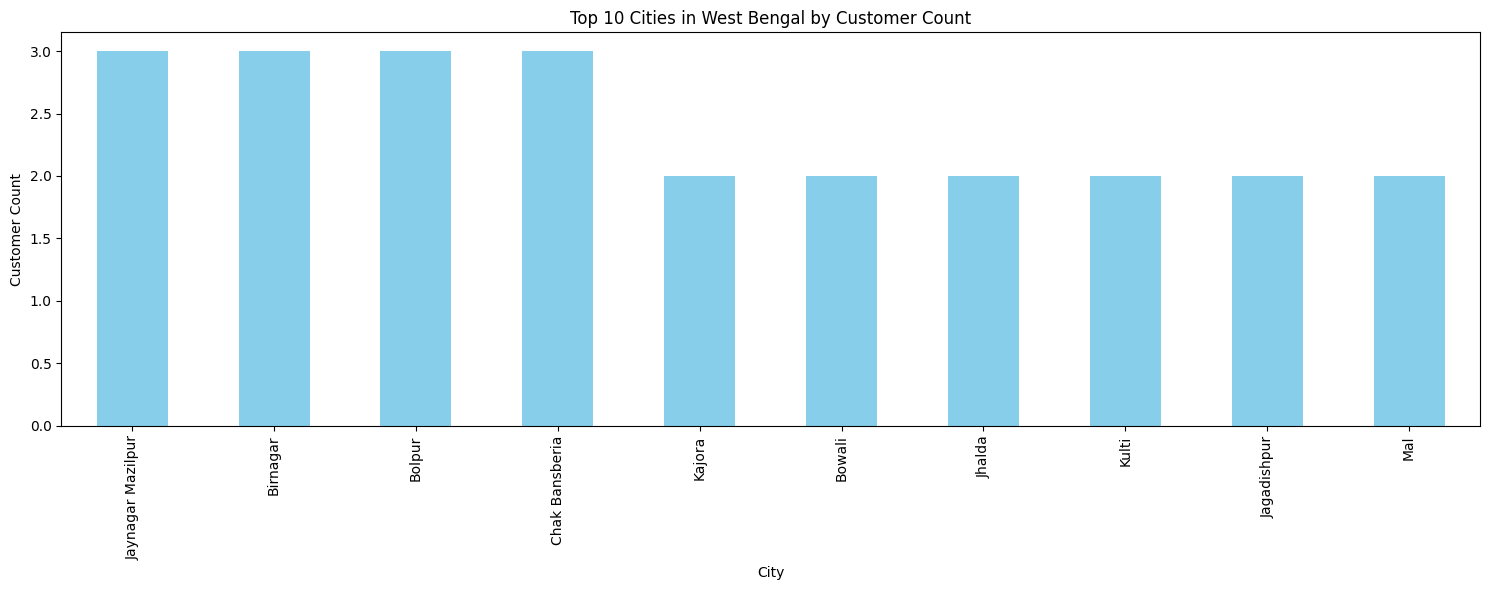

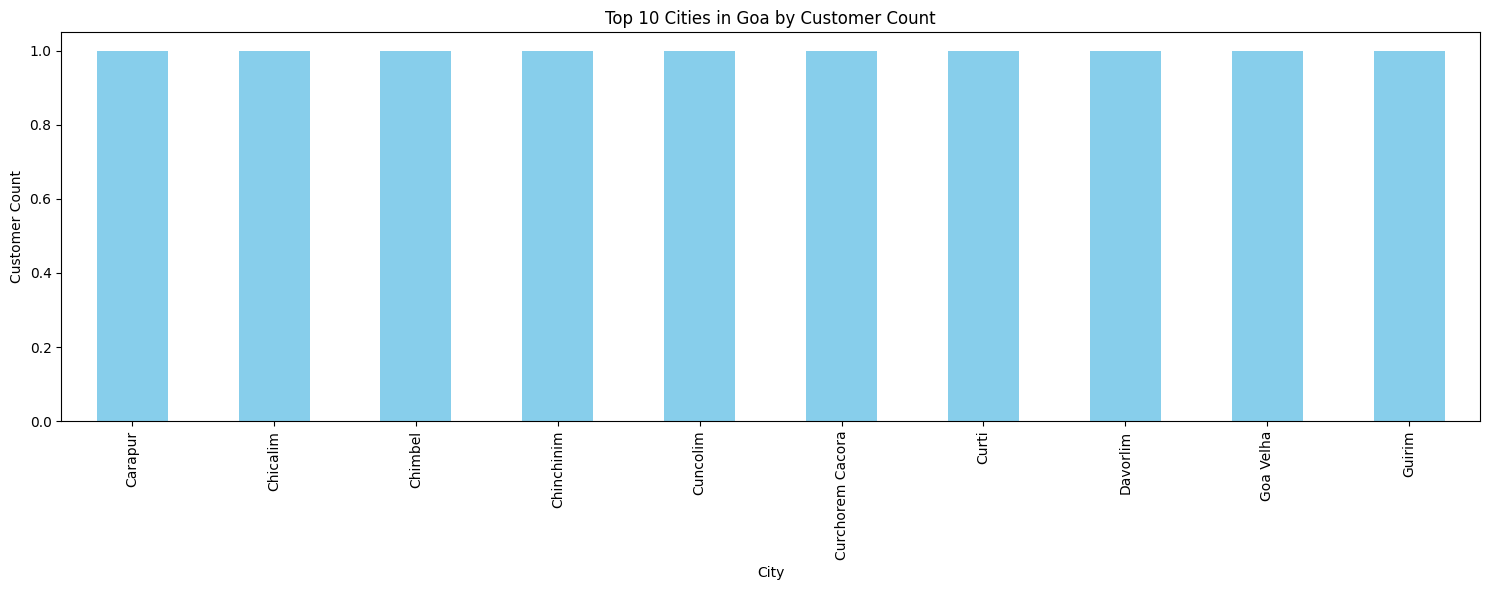

In [6]:
import matplotlib.pyplot as plt

# Get unique states from the dataset
states = customers_data['customer_state'].unique()

# Iterate over each state
for state in states:
    # Filter data for the current state
    state_data = customers_data[customers_data['customer_state'] == state]

    # Group by 'customer_city' and count number of customers in each city
    city_counts = state_data['customer_city'].value_counts().head(10)

    # Plot the bar plot
    plt.figure(figsize=(15,6))
    city_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Cities in {state} by Customer Count')
    plt.xlabel('City')
    plt.ylabel('Customer Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


**Insights from above chart:**
- By visualizing the top cities in each state, can observe the distribution of customers across different regions.This provides insights into the geographic spread of the customer base.
- The cities with the highest customer counts within each state likely represent major population centers or economic hubs. Cities with higher customer counts may indicate stronger competition from local or national competitors in the online marketplace sector.


In [122]:
geo_location_data.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

**We have no any null and duplicate value for the geo_location_data dataset, and in above charts we have analyzed for states and cities.**

In [8]:
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [123]:
orders_data.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
Order_Month_year                 0
purchase_approved_difference     0
approved_deliverd_difference     0
estimated_vs_actual_delivery     0
dtype: int64

In [10]:
orders_data.duplicated().sum()

0

**We have no any null and duplicate value for the orders_data dataset.**

In [12]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
dtypes: object(8)
memory usage: 5.9+ MB


In [13]:
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'])

orders_data['order_approved_at'] = pd.to_datetime(orders_data['order_approved_at'])

orders_data['order_delivered_carrier_date'] = pd.to_datetime(orders_data['order_delivered_carrier_date'])

orders_data['order_delivered_customer_date'] = pd.to_datetime(orders_data['order_delivered_customer_date'])

orders_data['order_estimated_delivery_date'] = pd.to_datetime(orders_data['order_estimated_delivery_date'])

**Monthly Treds of order**

<ipython-input-14-8bf545538f12>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=orders_data,y='Order_Month_year',palette=palette)


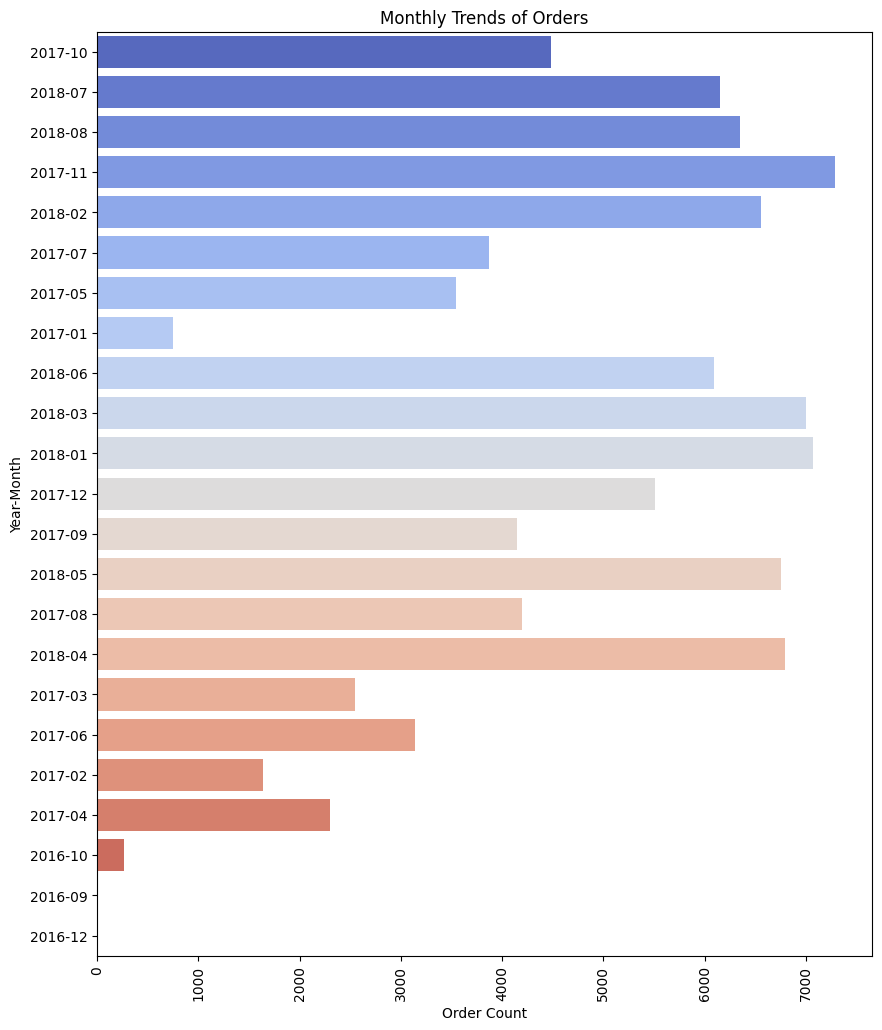

In [14]:
orders_data['Order_Month_year'] = orders_data['order_purchase_timestamp'].dt.strftime('%Y-%m')

plt.figure(figsize=(10,12))
palette = "coolwarm"
sns.countplot(data=orders_data,y='Order_Month_year',palette=palette)
plt.xlabel('Order Count')
plt.ylabel('Year-Month')
plt.title('Monthly Trends of Orders')
plt.xticks(rotation=90)

plt.show()

**Insights from above chart:**

- The number of orders shows a fluctuating trend over time, with some months having higher order counts compared to others
- There might be seasonal variations in order counts, with certain months experiencing higher order volumes, possibly due to factors like holidays, promotions, or seasonal trends in consumer behavior.**There appears to be a peak in order counts around November 2017, followed by a slight decrease in December and January before another peak in March and April.**

**Order approved purchse Difference**

In [15]:
orders_data['purchase_approved_difference'] = (orders_data['order_approved_at'] - orders_data['order_purchase_timestamp'])

orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Order_Month_year,purchase_approved_difference
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10,0 days 00:11:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07,1 days 06:43:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08,0 days 00:17:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11,0 days 00:17:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02,0 days 01:02:00


In [16]:
orders_data['purchase_approved_difference'].mean()

Timedelta('0 days 10:16:42.672748950')

**0 days** indicates that, on average, orders are approved on the same day they are placed.**10:16:42.672748950** indicates that, on average, it takes approximately 10 hours, 16 minutes, and 42 seconds for an order to be approved after it's been placed.

- The fact that orders are typically approved on the same day they are placed suggests that the approval process is relatively efficient. Customers do not have to wait for extended periods for their orders to be approved, which can positively impact their overall satisfaction with the service.
- While the average approval time is relatively short, there may still be room for improvement.

**Top 20 Most delayed orders**

In [17]:
orders_data['purchase_approved_difference'] = (orders_data['order_approved_at'] - orders_data['order_purchase_timestamp'])

orders_data.head()

Purchase_approved_df = orders_data[['order_id','order_purchase_timestamp','order_delivered_carrier_date','purchase_approved_difference']]

max_purchase_approved = Purchase_approved_df.groupby('order_id')['purchase_approved_difference'].mean()

max_purchase_approved_sorted = max_purchase_approved.sort_values(ascending=False).head(20)

max_purchase_approved_sorted

order_id
0a93b40850d3f4becf2f276666e01340   30 days 21:27:00
f7923db0430587601c2aef15ec4b8af4   30 days 18:27:00
de0076b42a023f53b398ce9ab0d9009c   23 days 02:48:00
daed0f3aefd193de33c31e21b16a3b3a   16 days 20:14:00
9c038e10f14d12a96939a0176c4ecc99   13 days 07:32:00
14ef2221cc3570aa6ce512fc353529b3   13 days 01:48:00
0c1426109d8295a688ee4182016bba59   12 days 12:26:00
483b53ea654d3566427a092cdef047fd   12 days 11:31:00
f5194ba2a4560ffa0e87746852c61fc1   12 days 10:57:00
70f357cca87c1162357bf3c0a993cbe5   12 days 03:24:00
cf72398d0690f841271b695bbfda82d2   12 days 03:19:00
8554cb37f7158cb0b082a841d24a4589   12 days 03:18:00
06eb87385425e5797a1a5c2cdb1b6559   12 days 03:17:00
77ca435b03fbf991e5027e3776e37885   12 days 03:07:00
1fab4ac9d85079b3da72a11475ae1685   12 days 03:02:00
0184d4ddb259e1a4cfc2871888cf97b8   12 days 02:13:00
c3b8c17ee15e0e798c2e178b7d4c7f42   12 days 02:04:00
bc4854efd86d9f42140c951c595d20c1   12 days 01:55:00
40de47dfa620d667117e4a6067b6e1ec   12 days 01:53:00
580

**Top 20 Most Earliest processed orders**

In [18]:
max_purchase_approved_sorted = max_purchase_approved.sort_values(ascending=True).head(20)

max_purchase_approved_sorted

order_id
c82c811a142105c1a90a09d4fb30da62   0 days
0307d42d9c781d32f86cdf1fa5c8670b   0 days
ef69d6f02be07ca6809eb8262e293157   0 days
988a21449c85e5aab93c446596246149   0 days
575b1b9f37a11b59ac98672fa8c487b2   0 days
98c012340047030b894d118bb56be94f   0 days
12cd98b885d11fa8260badce51a54ba0   0 days
5718fc130d653929872f0481438d3f66   0 days
9903b060ffcaca9244088e1f834fde2e   0 days
d8d8abd9a4aa1b36575678bdf5e9d23e   0 days
56c26c7e1d2d600fc5e6a4a6b0be3aa8   0 days
1f308a202c015c950d2a8562bcad7903   0 days
9934e7ff8eaacba82131dd85b7a0e156   0 days
efb6d19e3c56fa371d59421e45e53a49   0 days
994d36ec7dcfa4437a4560fd76447263   0 days
12b9b63b911cf0a24b137a184c48e4ee   0 days
99beb0ca1e257ea579db2f8e68d0165c   0 days
99e34b586d1fa26ea713021ff647d18d   0 days
1299a512fc464f808332d44a0e73f367   0 days
129538e4bc7308e9ab041540283813f2   0 days
Name: purchase_approved_difference, dtype: timedelta64[ns]

**Order approved and order deliverd to customer Difference**

In [20]:
orders_data['approved_deliverd_difference'] = orders_data['order_delivered_customer_date']-orders_data['order_approved_at']

orders_data['approved_deliverd_difference'].mean()

Timedelta('12 days 03:06:18.230470167')

- **On average, there is a time gap of approximately 12 days, 3 hours, and 6 minutes between when an order is approved and when it is delivered to the customer.**
- A longer average time indicates that inefficiencies or bottlenecks in the order fulfillment process, such as delays in order processing, packaging, shipping, or delivery
- Meeting or exceeding customer expectations regarding order delivery times is crucial for maintaining customer satisfaction and loyalty.

**Ensuring orders are completed within Service Level Agreements (SLAs) is essential for maintaining customer satisfaction and meeting business objectives. Here are the necessary steps to achieve this:**

1.  Streamline order management processes to minimize delays and errors. Implement efficient order processing systems, automate routine tasks, and prioritize orders based on urgency and SLAs.
2.  Maintain adequate inventory levels to fulfill orders promptly. Implement inventory tracking systems to monitor stock levels in real-time and prevent stockouts or overstock situations.
3. Partner with reliable shipping carriers or logistics providers to ensure timely and cost-effective order delivery. Negotiate service level agreements with shipping partners to meet SLAs for transit times and delivery reliability.
4. Optimize warehouse and fulfillment operations to expedite order processing and shipping. Implement efficient picking, packing, and shipping processes to reduce turnaround times.
5. Provide customers with real-time order tracking capabilities to monitor the status and location of their orders. Utilize tracking technologies such as GPS and order tracking software to enhance transparency and communication.


## **Order approved and order deliverd to customer Difference**

**Top 20 Most delayed deliverd orders**

In [22]:
approved_deliverd_df = orders_data[['order_id','order_approved_at','order_delivered_customer_date','approved_deliverd_difference']]

approved_deliverd = approved_deliverd_df.groupby('order_id')['approved_deliverd_difference'].mean()

approved_deliverd_sorted =approved_deliverd.sort_values(ascending=False).head(20)

approved_deliverd_sorted

order_id
ca07593549f1816d26a572e06dc1eab6   208 days 12:01:00
1b3190b2dfa9d789e1f14c05b647a14a   208 days 08:08:00
2fb597c2f772eca01b1f5c561bf6cc7b   194 days 20:24:00
285ab9426d6982034523a855f55a885e   194 days 15:13:00
440d0d17af552815d15a9e41abe49359   194 days 14:01:00
0f4519c5f1c541ddec9f21b3bddd533a   194 days 01:12:00
47b40429ed8cce3aee9199792275433f   191 days 10:20:00
2fe324febf907e3ea3f2aa9650869fa5   189 days 20:43:00
2d7561026d542c8dbd8f0daeadf67a43   188 days 03:14:00
c27815f7e3dd0b926b58552628481575   187 days 17:51:00
437222e3fd1b07396f1d9ba8c15fba59   187 days 04:52:00
dfe5f68118c2576143240b8d78e5940a   186 days 05:41:00
6e82dcfb5eada6283dba34f164e636f5   181 days 15:34:00
2ba1366baecad3c3536f27546d129017   179 days 12:28:00
d24e8541128cea179a11a65176e0a96f   175 days 05:11:00
3566eabb132f8d64741ae7b921bbd10e   173 days 12:57:00
2fa29503f2ebd9f53deba187160f3202   172 days 03:09:00
ed8e9faf1b75f43ee027103957135663   171 days 06:51:00
df6d8b7768a047c2981bae0a24afbb01   16

**Above are the top 20 most delayed orders for delivery after order approval**

In [23]:
approved_deliverd_sorted =approved_deliverd.sort_values(ascending=True).head(20)

approved_deliverd_sorted

order_id
bc4854efd86d9f42140c951c595d20c1   -7 days +00:15:00
1fab4ac9d85079b3da72a11475ae1685   -6 days +22:07:00
8554cb37f7158cb0b082a841d24a4589   -6 days +22:09:00
40de47dfa620d667117e4a6067b6e1ec   -6 days +22:43:00
4387477eec4b3c89b39f3f454940d059   -6 days +23:00:00
e73fe43cdcd166f7f0c6e3c2bf11a917   -6 days +23:49:00
6dcf0aeb8b1eb4021c26e1d0e9394979   -5 days +03:07:00
6b80bb20190715d71c43efff617bd659   -5 days +03:36:00
0184d4ddb259e1a4cfc2871888cf97b8   -5 days +16:55:00
bc1b85147b5edbb7cbefcf5c1bd5ded9   -5 days +21:26:00
a727355acb88d9b3e6e41fb2e3888a0e   -4 days +18:04:00
f222c56f035b47dfa1e069a88235d730   -4 days +20:39:00
6e57e23ecac1ae881286657694444267   -3 days +00:50:00
6fa0c125ee7d870f6602c97e33d87bc5   -3 days +04:52:00
66e1b657a71397245290f39ffe24031e   -3 days +15:27:00
cf72398d0690f841271b695bbfda82d2   -3 days +16:11:00
6df6c9c9af6ef75b4f06f8a7b9f47e9c   -3 days +17:32:00
c3b8c17ee15e0e798c2e178b7d4c7f42   -3 days +18:35:00
d836abb4444d8594455e9766104e958c   -3

**The negative average differences suggest potential data quality issues or errors in the timestamps recorded for order approval and delivery. It's essential to review and verify the accuracy of the timestamps to ensure data integrity and reliability.**

**Order delivered vs Estimated Delivery**

In [25]:
orders_data['estimated_vs_actual_delivery'] = orders_data['order_estimated_delivery_date']-orders_data['order_delivered_customer_date']

orders_data['estimated_vs_actual_delivery'].mean()

Timedelta('11 days 04:15:08.395210201')

- **On average, there is a delay of approximately 11 days from the estimated delivery date to the actual delivery date. This suggests that, on average, orders are delivered later than initially estimated.**
- Understanding the average delay between estimated and actual delivery dates can help manage customer expectations. Businesses can use this information to provide more accurate estimated delivery dates or to communicate potential delays to customers proactively.
- Timely delivery is often crucial for customer satisfaction. By reducing the average delivery delay, businesses can enhance customer experience and loyalty.

**order_items_data**

In [81]:
order_items_data.isnull().sum()


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [28]:
order_items_data.duplicated().sum()

0

**No any Null and duplicated value present in order_items_data dataset**

In [29]:
order_payment_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [82]:
order_payment_data.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
Revenue                 0
dtype: int64

**Payment type Distribution**

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64


Text(0.5, 1.0, 'Payment Distribution')

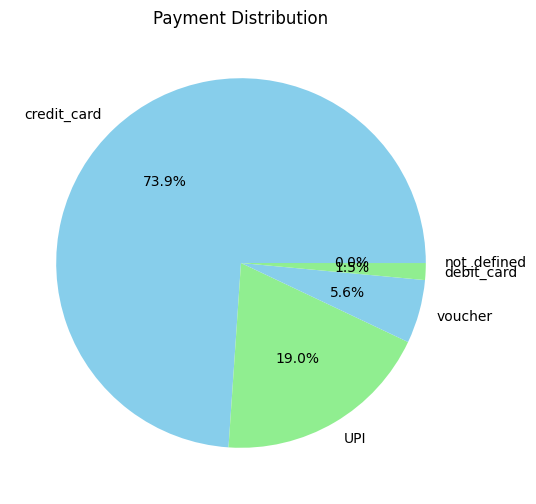

In [31]:
payment_distribution = order_payment_data['payment_type'].value_counts()

print(payment_distribution)

plt.figure(figsize=(15,6))
plt.pie(payment_distribution.values,labels=payment_distribution.index,autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Payment Distribution')

- Payment method distribution reflects customer preferences and behavior, providing insights into how customers prefer to complete transactions.
- The significant proportion of transactions made through digital payment methods like credit cards and UPI reflects the increasing trend towards cashless transactions and the adoption of digital payment technologies.
- UPI (Unified Payments Interface) is the second most popular payment method, indicating the growing adoption of digital payment solutions.Voucher and debit card transactions constitute smaller percentages compared to credit cards and UPI.
- The relatively low percentage of transactions using debit cards suggests that there may be opportunities to promote debit card payments or improve the user experience for customers using this payment method.

In [32]:
order_payment_data['payment_value'].max()

13664.08

In [33]:
order_payment_data['payment_value'].mean()

154.10038041699553

The maximum payment value observed in the dataset is $13,664.08. This represents the highest amount paid for a single transaction.The average payment value across all transactions is approximately $154.10

In [83]:
order_review_data.isnull().sum()


review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [36]:
order_review_data.duplicated().sum()

0

In [37]:
order_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**No any Null values and duplicate value present in this order_review_data dataset**

In [38]:
product_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,Baby,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,Housewares,37,402,4,625,20,17,13


In [84]:
product_data.isnull().sum()


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [40]:
product_data.duplicated().sum()

0

**No any Null values and duplicate value present in this product_data dataset**

In [41]:
sellers_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


Andhra Pradesh       2060
Gujarat               220
Chhattisgarh          205
Karnataka             107
Delhi                  89
Haryana                65
Jammu & Kashmir        50
Madhya Pradesh         46
Tamil Nadu             43
Maharashtra            35
Arunachal Pradesh      21
Kerala                 18
Rajasthan              17
Himachal Pradesh       16
Punjab                 15
Uttar Pradesh          13
Orissa                  9
West Bengal             8
Uttaranchal             1
Name: seller_state, dtype: int64


<ipython-input-42-461db3133450>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='seller_state', data=sellers_data, palette=palette)


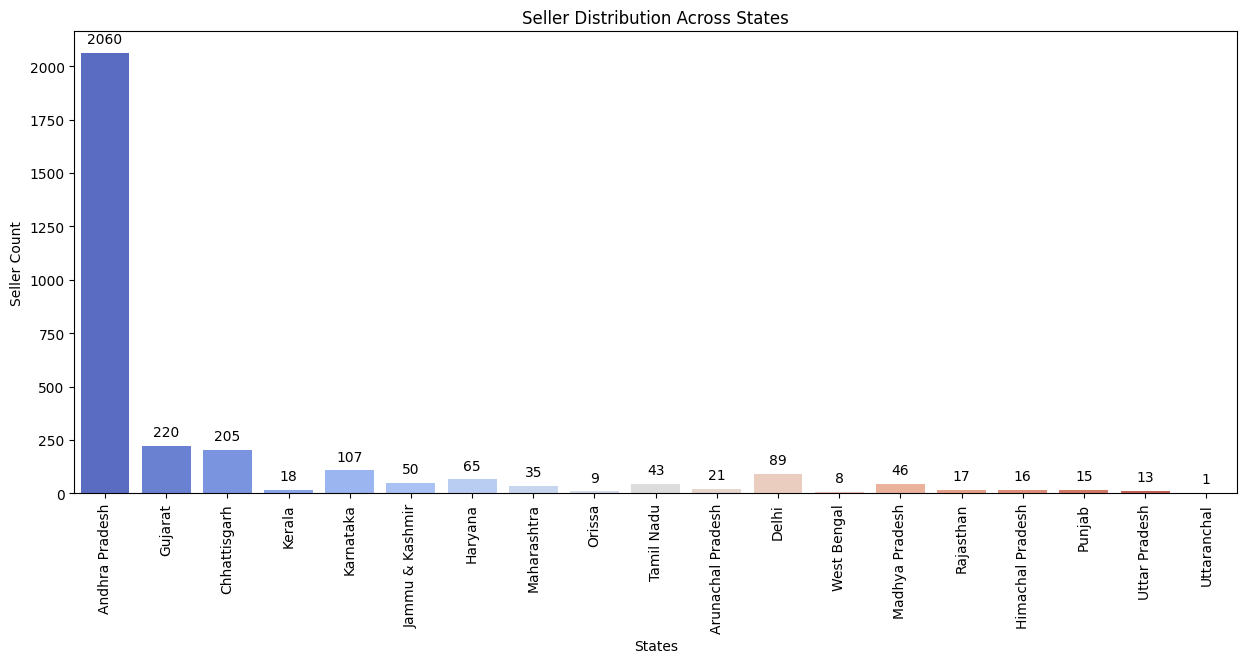

In [42]:
seller_counts = sellers_data['seller_state'].value_counts()

print(seller_counts)

plt.figure(figsize=(15, 6))
palette = "coolwarm"
ax = sns.countplot(x='seller_state', data=sellers_data, palette=palette)

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')


plt.xlabel('States')
plt.ylabel('Seller Count')
plt.title('Seller Distribution Across States')
plt.xticks(rotation=90)
plt.show()

- States like Andhra Pradesh, Gujarat, and Chhattisgarh have a relatively higher number of sellers, indicating potential business activity or a concentration of sellers in those regions.
- In contrast, states like Uttaranchal, West Bengal, and Orissa have fewer sellers, suggesting lower participation or presence of sellers in those areas.

## **Now will move towards Business Objects**



### **Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Totalpayment methods etc…)**

**Total Revenue**

In [43]:
order_payment_data['Revenue'] = order_payment_data['payment_installments'] * order_payment_data['payment_value']

order_payment_data.head()

Total_Revenue = order_payment_data['Revenue'].sum()

print('Total Revenue = ',Total_Revenue)

Total Revenue =  65763157.62


In [44]:
Total_Quantity = order_items_data['order_item_id'].sum()

print('Total Quantity = ',Total_Quantity)

Total Quantity =  134936


In [45]:
Total_Product = product_data['product_id'].nunique()

print('Total Product = ',Total_Product)

Total Product =  32327


In [46]:
Total_Categories = product_data['product_category_name'].nunique()

print('Total Product Categories = ',Total_Categories)

Total Product Categories =  71


In [47]:
Total_sellers = sellers_data['seller_id'].nunique()

print('Total Seller =',Total_sellers)

Total Seller = 3095


In [48]:
Total_Location = geo_location_data['geolocation_zip_code_prefix'].nunique()

print('Total Location =',Total_Location)

Total_States = geo_location_data['geolocation_state'].nunique()

print('Total States =',Total_States)

Total_cities = geo_location_data['geolocation_city'].nunique()

print('Total Cities =',Total_cities)

Total Location = 19015
Total States = 20
Total Cities = 3809


In [49]:
Total_channel = order_payment_data['payment_type'].nunique()

print('Total Payment Channel = ',Total_channel)

Total Payment Channel =  5


- **Total Revenue:** The total revenue generated during the specified period is $65,763,157.62. This indicates the overall financial performance of the business over the given timeframe.

- **Total Quantity:** A total of 134,936 products were sold. This metric provides insights into the volume of goods moved through the marketplace.

- **Total Products:** The marketplace offers a wide range of products, with a total of 32,327 unique products available. This suggests diversity in product offerings, catering to various customer preferences.

- **Total Product Categories:** There are 71 distinct product categories available on the platform. Understanding the distribution of products across these categories can help identify popular and niche segments.

- **Total Sellers:** The platform is supported by 3,095 sellers. A large number of sellers indicate a vibrant ecosystem of suppliers contributing to the marketplace.

- **Total Locations, States, and Cities:** The marketplace operates across 19,015 locations, spanning 20 states and 3,809 cities in India. This extensive geographic coverage suggests a wide reach and potential customer base.

- **Total Payment Channels:** There are 5 payment channels available for customers to complete transactions. Analyzing payment preferences and channel usage can provide insights into customer behavior and preferences.

### **Understanding how many new customers acquired every month**

In [50]:
customer_order_data = pd.merge(customers_data,orders_data,how = 'left',on ='customer_id')

customer_order_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Order_Month_year,purchase_approved_difference,approved_deliverd_difference,estimated_vs_actual_delivery
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,2017-05,0 days 00:17:00,8 days 19:13:00,10 days 13:25:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,2018-01,0 days 00:10:00,16 days 15:43:00,7 days 11:19:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,2018-05,1 days 00:12:00,25 days 01:39:00,-2 days +06:02:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,2018-03,0 days 01:23:00,14 days 22:35:00,12 days 07:56:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,2018-07,0 days 00:19:00,11 days 10:45:00,5 days 03:05:00


In [112]:
new_customers_per_month = customer_order_data.groupby('Order_Month_year')['customer_unique_id'].nunique()

new_customers_per_month.reset_index()

,Order_Month_year,customer_unique_id
0,2016-09,1
1,2016-10,262
2,2016-12,1
3,2017-01,716
4,2017-02,1618
5,2017-03,2508
6,2017-04,2274
7,2017-05,3478
8,2017-06,3076
9,2017-07,3802


<ipython-input-52-901288b40309>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_order_data, x='Order_Month_year', palette='coolwarm')


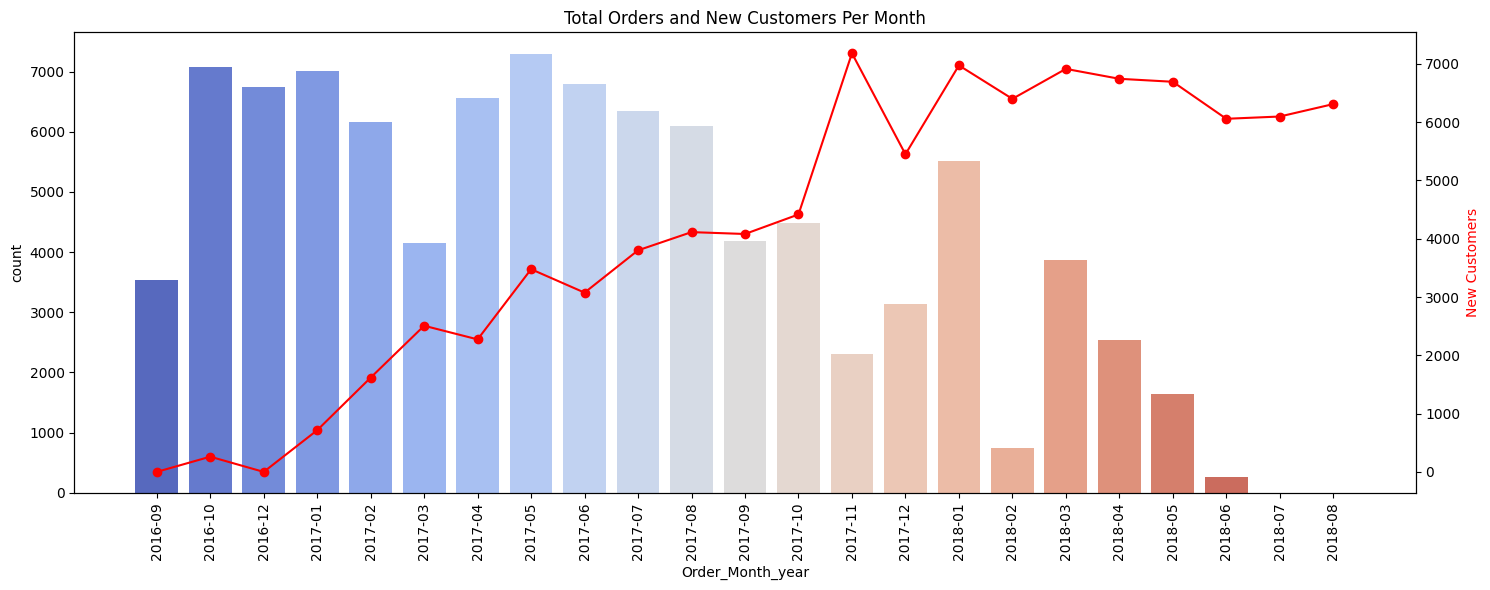

In [52]:
plt.figure(figsize=(15, 6))

sns.countplot(data=customer_order_data, x='Order_Month_year', palette='coolwarm')
plt.xticks(rotation=90)

plt.twinx()
plt.plot(new_customers_per_month.index.astype(str), new_customers_per_month.values, color='red', marker='o')
plt.title('Total Orders and New Customers Per Month')
plt.xlabel('Month-Year')
plt.ylabel('Total Orders', color='blue')
plt.ylabel('New Customers', color='red')
plt.tight_layout()
plt.show()


**Insights from above chart:**
- The countplot of total orders per month shows fluctuations in order volume over time. There seems to be variability in the number of orders placed across different months, indicating potential seasonal patterns or changes in customer behavior.
- The line plot of new customers per month overlaid on the countplot highlights the trend in acquiring new customers over the same period.
- Observing the relationship between total orders and new customers per month can provide insights into the effectiveness of marketing campaigns, promotions, or other initiatives aimed at attracting new customers.
- Analyzing the combined plot allows for a holistic evaluation of business performance, considering both customer acquisition and order volume. It helps identify periods of growth, potential challenges, and areas for improvement in customer acquisition and order fulfillment processes.

**Understand the retention of customers on month on month basis**

In [53]:
monthly_customers = customer_order_data.groupby('Order_Month_year')['customer_unique_id'].count().reset_index()

monthly_customers

,Order_Month_year,customer_unique_id
0,2016-09,1
1,2016-10,265
2,2016-12,1
3,2017-01,748
4,2017-02,1641
5,2017-03,2546
6,2017-04,2303
7,2017-05,3545
8,2017-06,3135
9,2017-07,3872


In [85]:
Cust_YrMth=customer_order_data.loc[:,['customer_unique_id','Order_Month_year']]

Cust_YrMth.drop_duplicates(subset=['customer_unique_id'],keep='first',inplace=True)

CustAcquired=Cust_YrMth.groupby('Order_Month_year')['customer_unique_id'].count()

CustAcquired.reset_index()

,Order_Month_year,customer_unique_id
0,2016-09,1
1,2016-10,256
2,2017-01,700
3,2017-02,1591
4,2017-03,2464
5,2017-04,2220
6,2017-05,3385
7,2017-06,2998
8,2017-07,3718
9,2017-08,4011


In [56]:
cust_ret = pd.merge(left=monthly_customers,right=CustAcquired,on='Order_Month_year')

cust_ret

cust_ret['Customer_retention_count'] = cust_ret.customer_unique_id_x - cust_ret.customer_unique_id_y

cust_ret

cust_ret['Retention_rate'] =cust_ret['Customer_retention_count'].pct_change()

cust_ret

,Order_Month_year,customer_unique_id_x,customer_unique_id_y,Customer_retention_count,Retention_rate
0,2016-09,1,1,0,NaN
1,2016-10,265,256,9,inf
2,2017-01,748,700,48,4.333333
3,2017-02,1641,1591,50,0.041667
4,2017-03,2546,2464,82,0.640000
5,2017-04,2303,2220,83,0.012195
6,2017-05,3545,3385,160,0.927711
7,2017-06,3135,2998,137,-0.143750
8,2017-07,3872,3718,154,0.124088
9,2017-08,4193,4011,182,0.181818


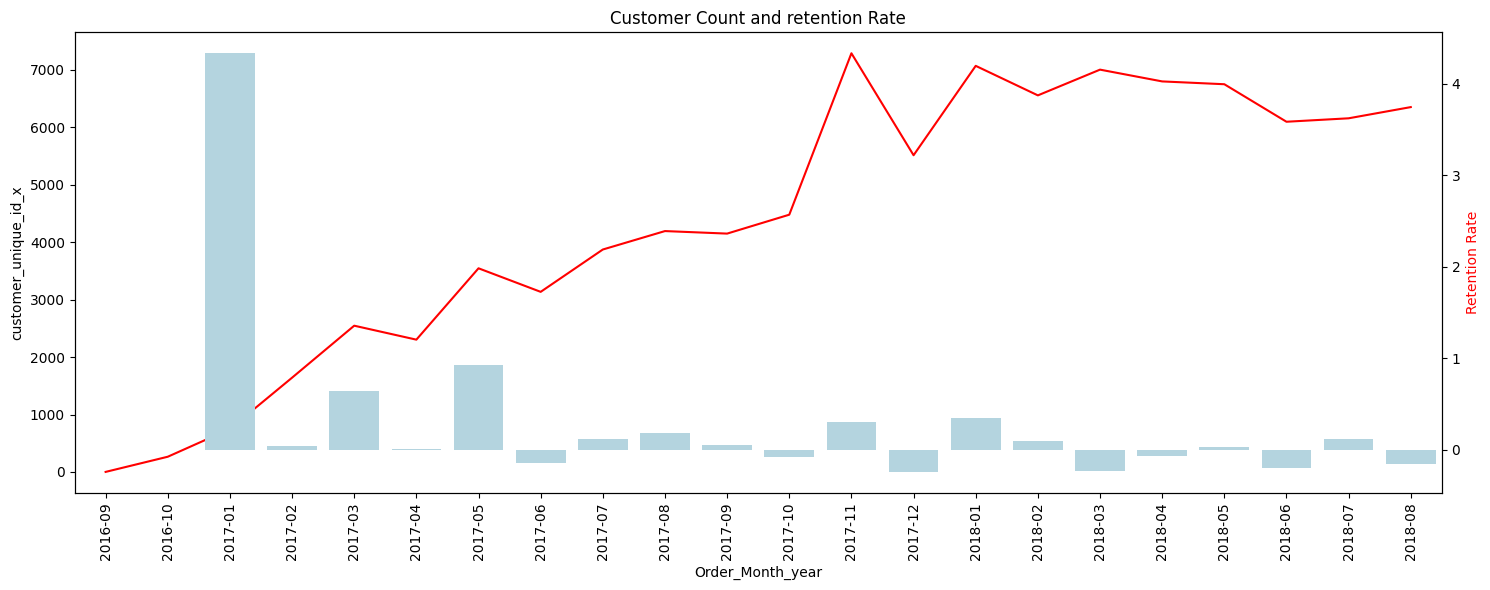

In [57]:
plt.figure(figsize=(15, 6))
sns.lineplot(data =cust_ret, x='Order_Month_year',y ='customer_unique_id_x',color='red',markers=True, dashes=True)
plt.xticks(rotation=90)

plt.twinx()
sns.barplot(data =cust_ret, x='Order_Month_year',y ='Retention_rate', color='lightblue')
plt.title('Customer Count and retention Rate')
plt.xlabel('Month-Year')
plt.ylabel('Customer Count', color='blue')
plt.ylabel('Retention Rate', color='red')
plt.tight_layout()
plt.show()

**Insights from above chart:**
- The line plot shows the trend in the total number of customers over time (represented by 'customer_unique_id_x'). Fluctuations in the customer count indicate changes in customer acquisition and churn rates across different months.
- The bar plot represents the retention rate for each month (represented by 'Retention_rate'). The retention rate indicates the proportion of customers from the previous month who continue to make purchases in the current month. Positive retention rates imply growth in the customer base, while negative retention rates suggest a decline.
- Observing the relationship between the total customer count and retention rate per month provides insights into customer loyalty and churn dynamics. Peaks or troughs in the retention rate may correlate with corresponding changes in the customer count.
- Patterns such as increases or decreases in both customer count and retention rate over consecutive months can highlight periods of significant customer growth or attrition.

**How the revenues from existing/new customers on month on month basis**

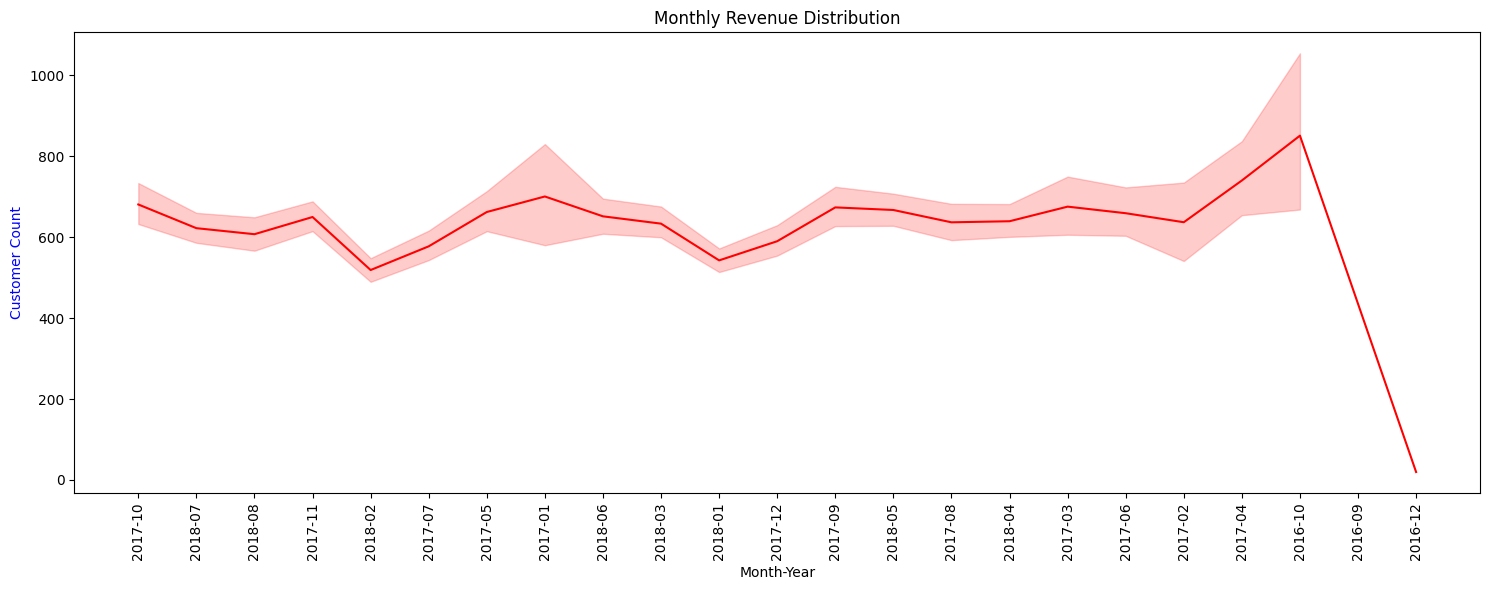

In [58]:
payment_order_data = pd.merge(orders_data,order_payment_data,how='left',on='order_id')

payment_order_data.head()

monthly_revenue = payment_order_data.groupby('Order_Month_year')['Revenue'].sum()

monthly_revenue

plt.figure(figsize=(15,6))
sns.lineplot(data =payment_order_data, x='Order_Month_year',y ='Revenue',color='red',markers=True, dashes=True)
plt.xticks(rotation=90)
plt.title('Monthly Revenue Distribution')
plt.xlabel('Month-Year')
plt.ylabel('Customer Count', color='blue')
plt.tight_layout()
plt.show()

**Insights from above chart:**
- The line plot illustrates the trend in monthly revenue over the specified period. Fluctuations in revenue levels across different months indicate variations in sales performance and business activity.
- Monitoring monthly revenue distribution allows businesses to evaluate their financial performance over time. Positive trends and consistent growth in revenue suggest a healthy business trajectory, while declines may indicate challenges or areas for improvement.

### **Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…**

**1.Category wise Revenue**

In [59]:
product_and_order_items_data = pd.merge(left=product_data,right=order_items_data,on='product_id')

Category_Wise_Reveue = product_and_order_items_data.groupby('product_category_name')['price'].sum().reset_index()

Category_Wise_Reveue

,product_category_name,price
0,Agro_Industry_And_Commerce,72530.47
1,Air_Conditioning,55024.96
2,Art,24202.64
3,Arts_And_Craftmanship,1814.01
4,Audio,50688.50
...,...,...
66,Stationery,230943.23
67,Tablets_Printing_Image,7528.41
68,Telephony,323667.53
69,Toys,483946.60


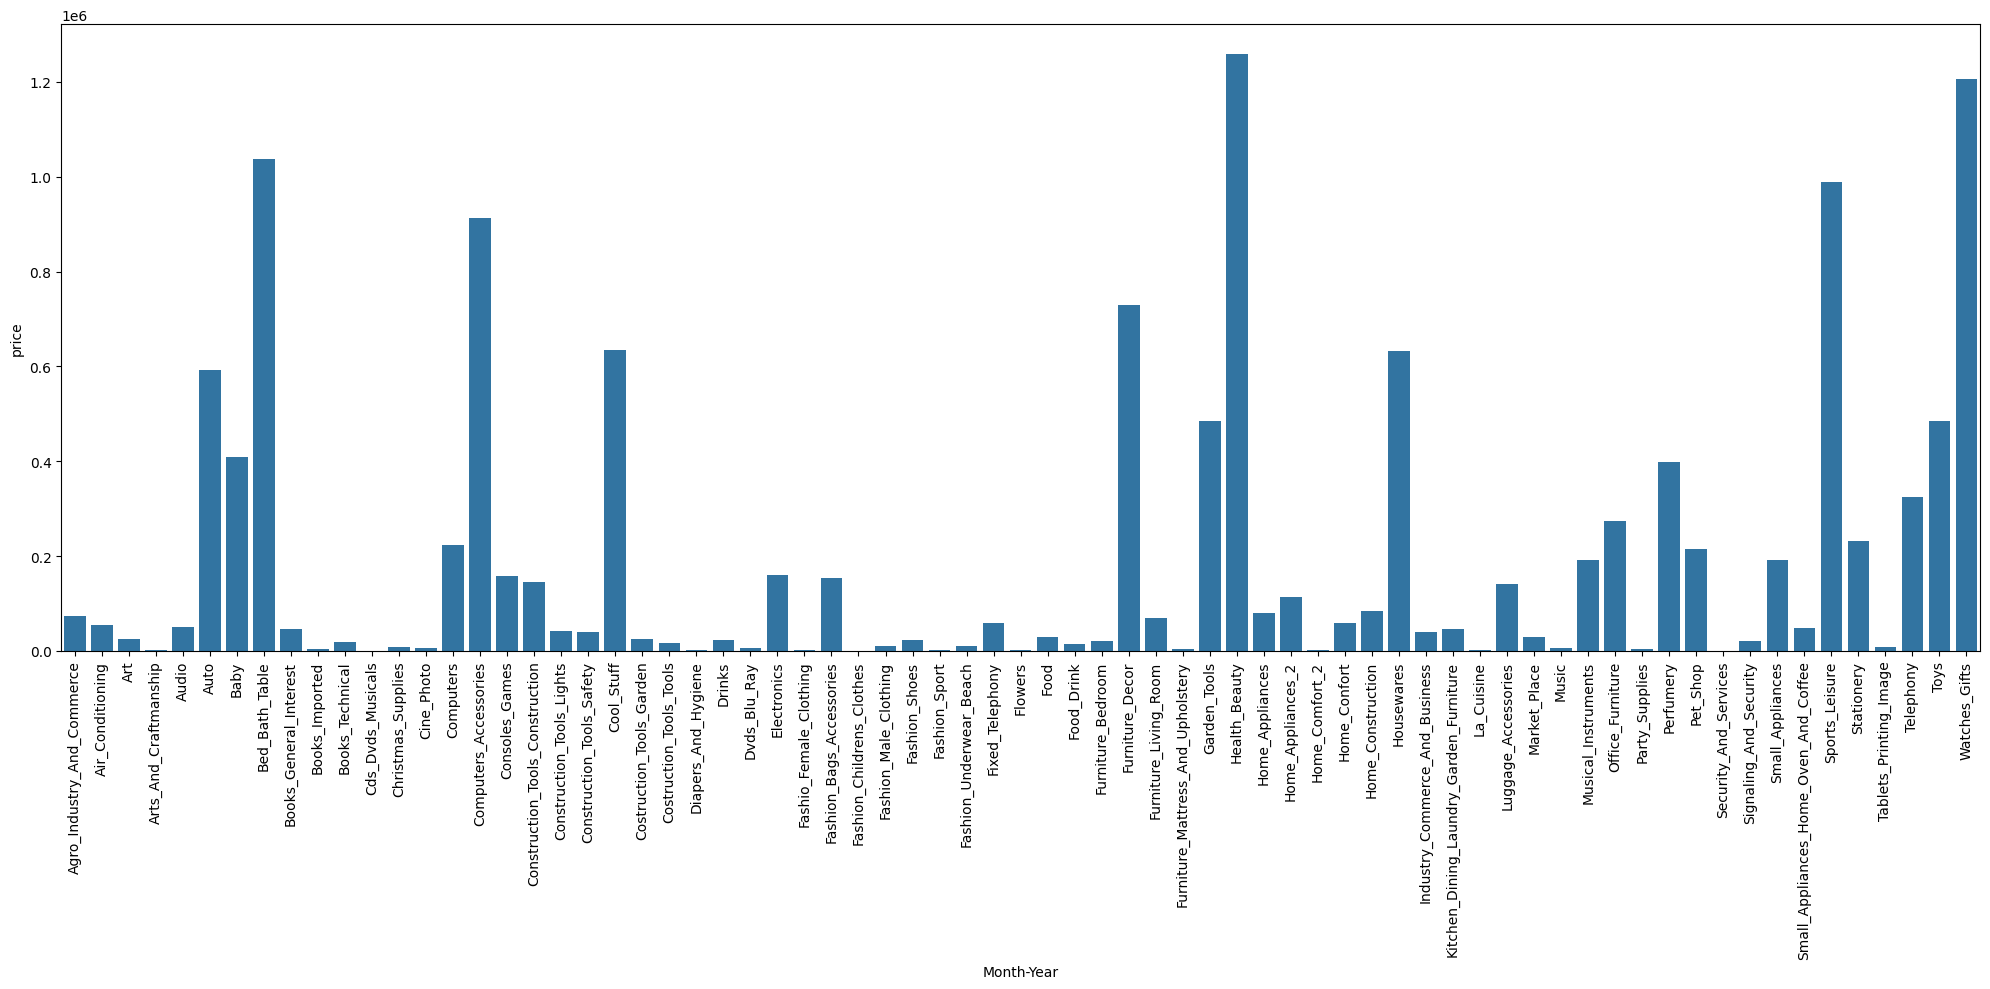

In [60]:
plt.figure(figsize=(20,10))
sns.barplot(x='product_category_name',y='price',data=Category_Wise_Reveue)
plt.xticks(rotation=90)
plt.xlabel('Month-Year')
plt.tight_layout()
plt.show()

**Revenue By Location**

       customer_state      Revenue
0      Andhra Pradesh  35762827.39
1   Arunachal Pradesh    776655.41
2        Chhattisgarh   4553290.58
3               Delhi   2355077.29
4                 Goa      2825.88
5             Gujarat   5187133.03
6             Haryana   1451275.52
7    Himachal Pradesh    531237.05
8     Jammu & Kashmir   1101070.05
9           Karnataka   2600066.13
10             Kerala   1007363.44
11     Madhya Pradesh   2087130.58
12        Maharashtra   1409997.03
13             Orissa    511864.36
14             Punjab    458609.46
15          Rajasthan    676481.42
16         Tamil Nadu   1570281.01
17      Uttar Pradesh    808915.90
18        Uttaranchal     69415.49
19        West Bengal    307725.11


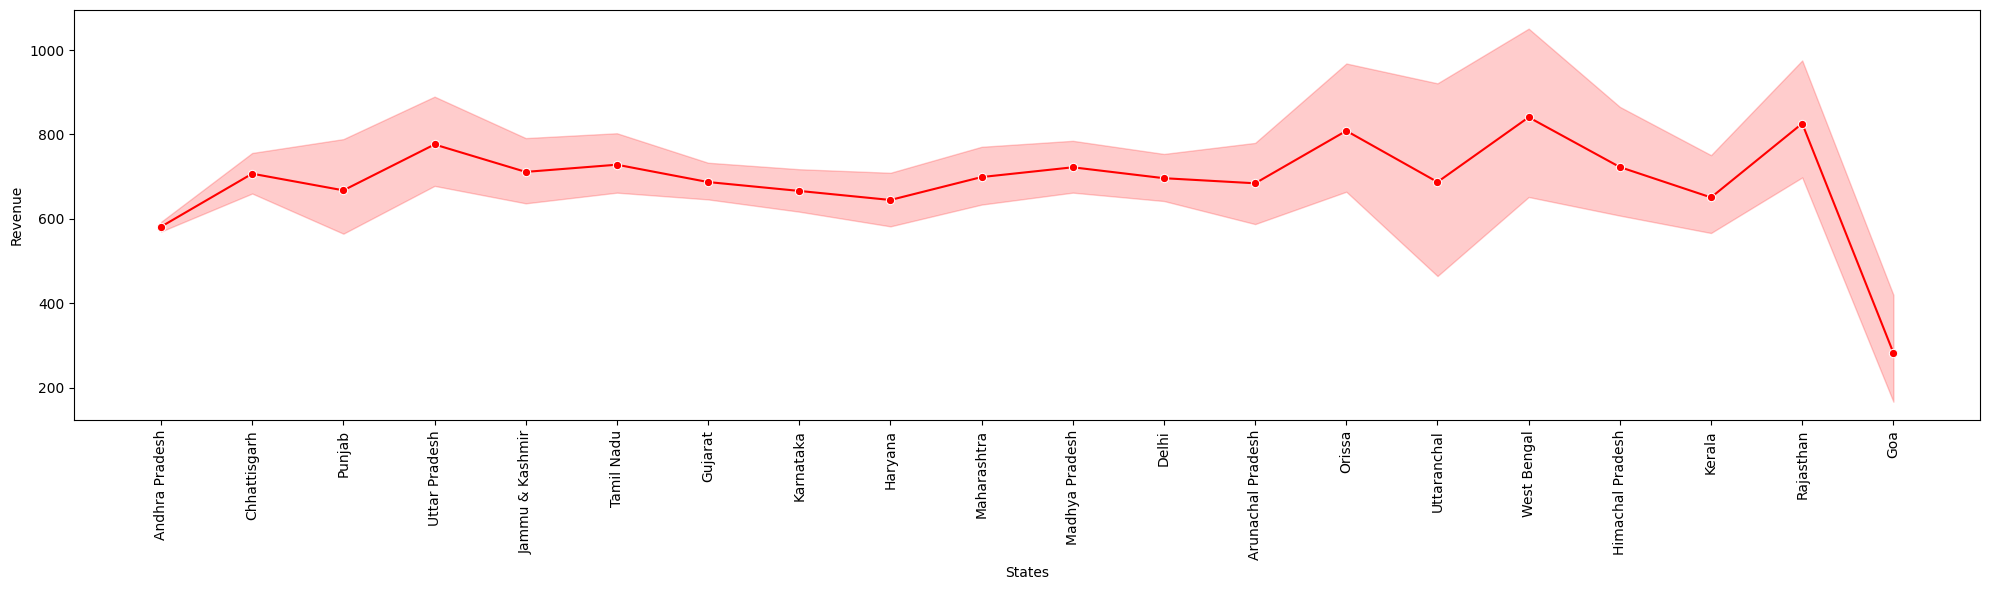

In [114]:
customer_payment_location_data = pd.merge(payment_order_data,customers_data,on='customer_id')

customer_payment_location_data.columns

location_revenue = customer_payment_location_data.groupby('customer_state')['Revenue'].sum()

print(location_revenue.reset_index())

plt.figure(figsize=(20,6))
sns.lineplot(x='customer_state',y='Revenue',data=customer_payment_location_data,marker='o',color='red')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

**Insights from above chart:**
- The line plot provides a visual representation of revenue distribution across different states. It allows for a quick comparison of revenue contributions from various regions.
- States like Andhra Pradesh, Gujarat, and Chhattisgarh appear to contribute significantly to the total revenue. On the other hand, states like Goa, Uttaranchal, and West Bengal have relatively lower revenue contributions.

**Trend of sales & quantity by Channel/Payment Method**

  payment_type  order_id  payment_value
0          UPI     19784     2869361.27
1  credit_card     76795    12542084.19
2   debit_card      1529      217989.79
3      voucher      5775      379436.87


<ipython-input-115-71177e5b75f9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type',data=order_payment_data,palette='coolwarm')


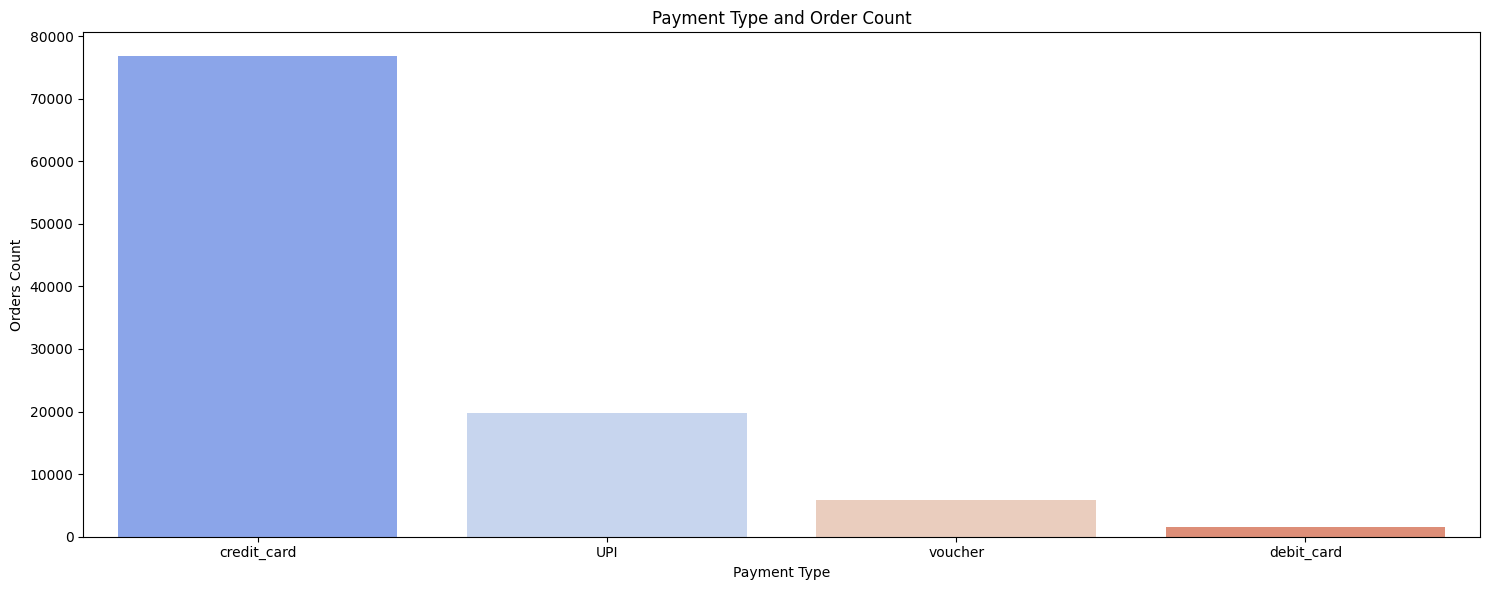

In [115]:
order_payment_data = order_payment_data[order_payment_data['payment_type']!='not_defined']

payment_method_trend = order_payment_data.groupby('payment_type').agg({'order_id':'count','payment_value':'sum'}).reset_index()

print(payment_method_trend)

plt.figure(figsize=(15, 6))
sns.countplot(x='payment_type',data=order_payment_data,palette='coolwarm')

plt.title('Payment Type and Order Count')
plt.xlabel('Payment Type')
plt.ylabel('Orders Count')
plt.tight_layout()
plt.show()

**Insights from above plot:**
-  The countplot illustrates the distribution of orders across different payment types. It provides insight into the popularity and usage of various payment methods among customers.
- The plot indicates that the most commonly used payment methods are credit card and UPI (Unified Payments Interface), as they have significantly higher order counts compared to debit card and voucher payments.
- Understanding payment preferences can help businesses tailor their payment processing infrastructure to accommodate the preferred methods of their customers.
- Identifying less popular payment methods, such as debit card and voucher payments, may present opportunities for targeted promotional campaigns or incentives to encourage their adoption.

**Popular Products by month, seller, state, category.**

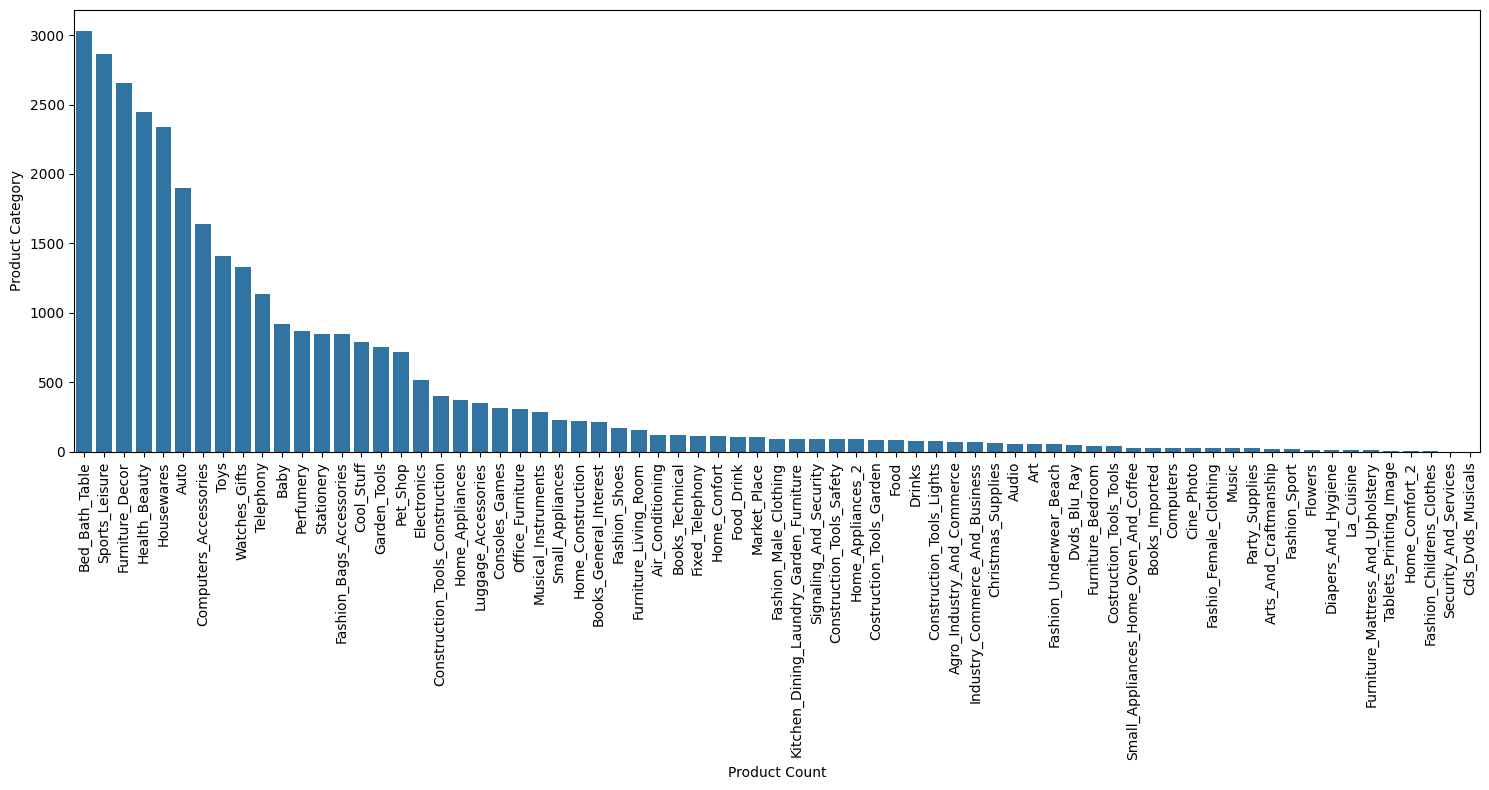

In [65]:
populer_product = product_data.groupby('product_category_name')['product_id'].count()

populer_product_sorted = populer_product.sort_values(ascending=False).reset_index()

populer_product_sorted

plt.figure(figsize=(15,8))
sns.barplot(y='product_id',x='product_category_name',data=populer_product_sorted)
plt.xticks(rotation=90)
plt.xlabel('Product Count')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

**Insights from above chart:**
- The bar plot displays the distribution of products across different product categories. Each bar represents the count of products within a specific category, allowing for easy comparison of category sizes.


**Popular Products by Month**

In [92]:
payment_order_data['Month'] = payment_order_data['order_purchase_timestamp'].dt.strftime('%b-%Y')

populer_product_by_month = pd.merge(product_and_order_items_data,payment_order_data,on='order_id')

populer_product_by_month.head()

month_pop_product = populer_product_by_month.groupby(['Month','product_category_name']).agg({'product_id':'count'}).sort_values(by=['product_id'],ascending=False)

month_pop_product.drop_duplicates()

,,product_id
Month,product_category_name,
Nov-2017,Bed_Bath_Table,1004
Feb-2018,Computers_Accessories,983
Jan-2018,Bed_Bath_Table,901
Jun-2018,Health_Beauty,893
Aug-2018,Health_Beauty,863
...,...,...
Sep-2017,Costruction_Tools_Garden,5
Dec-2017,Fashion_Male_Clothing,4
Aug-2018,Fashion_Shoes,3


**Populer Product by State**

In [67]:
product_state = pd.merge(populer_product_by_month,customer_payment_location_data,on='order_id')

product_state.columns

populer_product_by_state = product_state.groupby(['customer_state','product_category_name']).agg({'order_id':'count'}).sort_values(by=['order_id'],ascending=False)

populer_product_by_state

order_id
customer_state product_category_name                          
Andhra Pradesh Bed_Bath_Table                            11018
               Health_Beauty                              6629
               Furniture_Decor                            6593
               Sports_Leisure                             6204
               Housewares                                 6063
...                                                        ...
Tamil Nadu     Cine_Photo                                    1
Kerala         Small_Appliances_Home_Oven_And_Coffee         1
               Party_Supplies                                1
Chhattisgarh   Arts_And_Craftmanship                         1
Tamil Nadu     Dvds_Blu_Ray                                  1

[1073 rows x 1 columns]

**Popular Products by Seller**

In [68]:
populer_product_seller = product_and_order_items_data.groupby(['seller_id','product_category_name']).agg({'order_id':'count'}).sort_values(by=['order_id'],ascending=False)

populer_product_seller

,,order_id
seller_id,product_category_name,
1f50f920176fa81dab994f9023523100,Garden_Tools,1882
6560211a19b47992c3666cc44a7e94c0,Watches_Gifts,1628
4a3ca9315b744ce9f8e9374361493884,Bed_Bath_Table,1572
1025f0e2d44d7041d6cf58b6550e0bfa,Furniture_Decor,1292
da8622b14eb17ae2831f4ac5b9dab84a,Bed_Bath_Table,1277
...,...,...
834f3294fba9f932f56edc879193f925,Home_Appliances_2,1
83645b1645cdee8953ee54c29ceed564,Perfumery,1
8378eb36b6b70c5734e83ad7b8cdc3b7,Construction_Tools_Construction,1


**Popular Categories by State**

In [69]:
category_state_data = pd.merge(populer_product_by_month,customer_payment_location_data,on='order_id')

category_state_data.head()

populer_category_state = category_state_data.groupby(['product_category_name','customer_state']).agg({'order_id':'count'}).sort_values(by=['order_id'],ascending=False).drop_duplicates()

populer_category_state

,,order_id
product_category_name,customer_state,
Bed_Bath_Table,Andhra Pradesh,11018
Health_Beauty,Andhra Pradesh,6629
Furniture_Decor,Andhra Pradesh,6593
Sports_Leisure,Andhra Pradesh,6204
Housewares,Andhra Pradesh,6063
...,...,...
Fixed_Telephony,Tamil Nadu,5
Agro_Industry_And_Commerce,Kerala,4
Art,Punjab,3


**List top 10 most expensive products sorted by price**

   product_category_name       price
0          Health_Beauty  1258681.34
1          Watches_Gifts  1205005.68
2         Bed_Bath_Table  1036988.68
3         Sports_Leisure   988048.97
4  Computers_Accessories   911954.32
5        Furniture_Decor   729762.49
6             Cool_Stuff   635290.85
7             Housewares   632248.66
8                   Auto   592720.11
9           Garden_Tools   485256.46


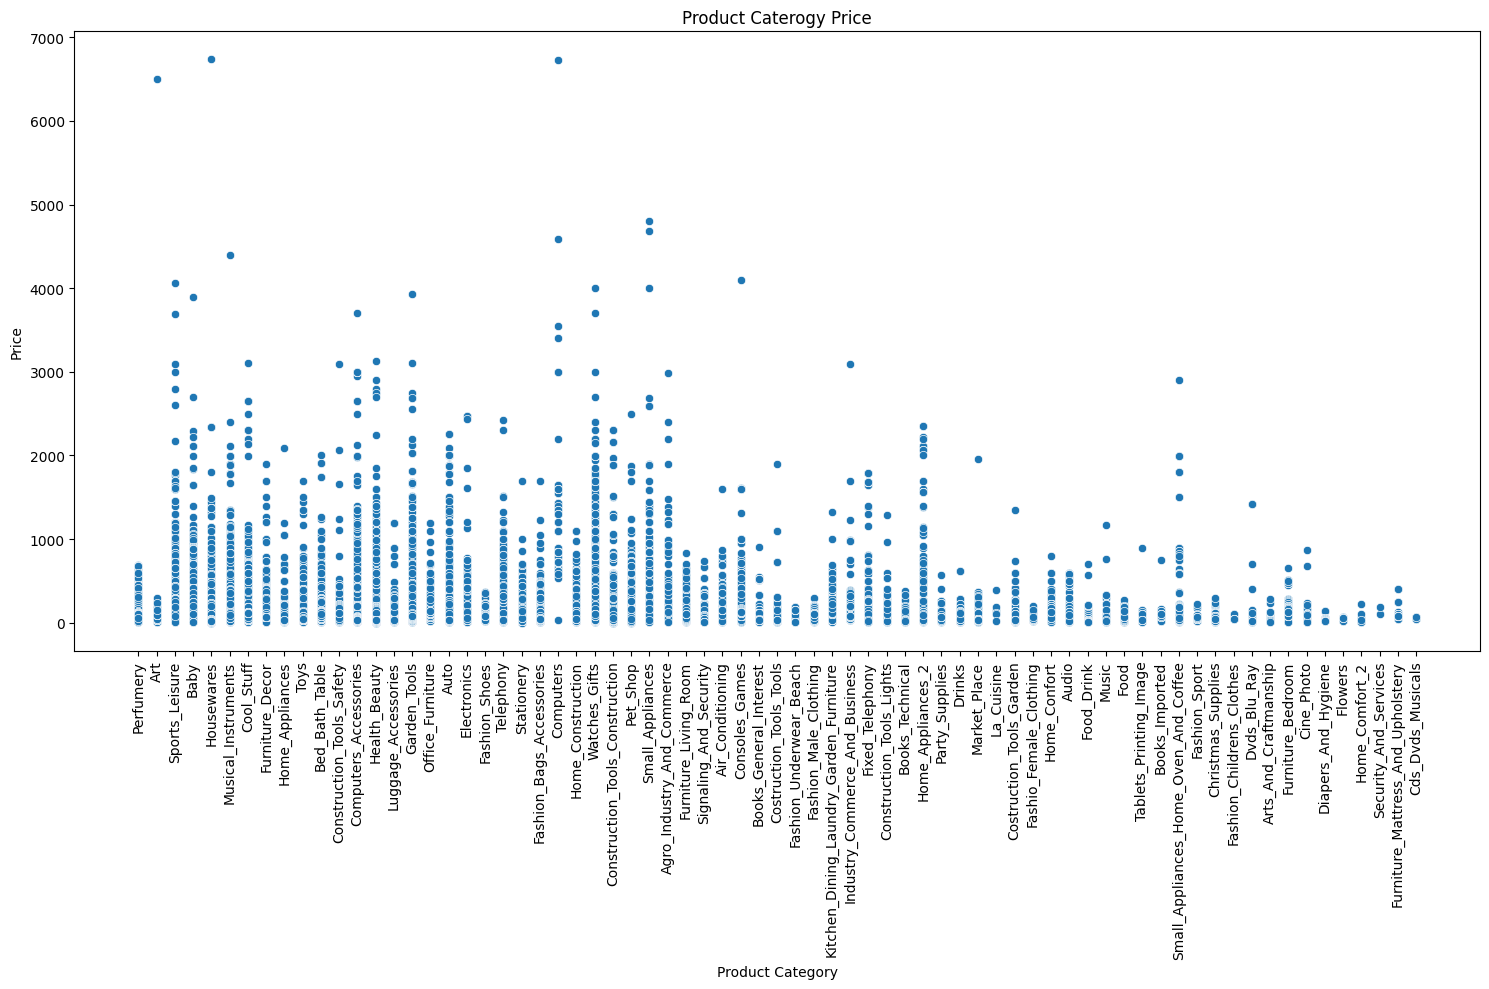

In [117]:
most_expensive = product_and_order_items_data.groupby('product_category_name')['price'].sum()

most_expensive_sorted = most_expensive.sort_values(ascending=False).head(10).reset_index()

print(most_expensive_sorted)

plt.figure(figsize=(15,10))
sns.scatterplot(x='product_category_name',y= 'price',data =product_and_order_items_data)
plt.xticks(rotation=90)
plt.title('Product Caterogy Price')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

**Insights from above chart:**

- The table shows the top 10 most expensive product categories based on the total price. These categories represent areas where customers are spending the most money, indicating potentially high-value products or premium offerings.
- The scatter plot visualizes the distribution of prices across different product categories. Each point represents a product category, with its position on the y-axis indicating the total price of products within that category.
- Health & Beauty and Watches & Gifts, have significantly higher total prices compared to others, suggesting that products in these categories may be more expensive or have higher profit margins.

## **2. Performing Customers/sellers Segmentation**

### **2.1 Divide the customers into groups based on the revenue generatedide the customers into groups based on the revenue generated**

In [98]:
Revenue_data = customer_payment_location_data[['customer_id','customer_unique_id','Revenue']]

Revenue_data['Customer_segments'] = np.where(Revenue_data['Revenue']<500,'Low_Profile_Customer',np.where(Revenue_data['Revenue']>1000,
                                                                                                          'High_Profile_Customer','Mid_Profile_Customer'))

Revenue_data.reset_index()

<ipython-input-98-b2dbe75980fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Revenue_data['Customer_segments'] = np.where(Revenue_data['Revenue']<500,'Low_Profile_Customer',np.where(Revenue_data['Revenue']>1000,


,index,customer_id,customer_unique_id,Revenue,Customer_segments
0,0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,18.12,Low_Profile_Customer
1,1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2.00,Low_Profile_Customer
2,2,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,18.59,Low_Profile_Customer
3,3,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,141.46,Low_Profile_Customer
4,4,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,537.36,Mid_Profile_Customer
...,...,...,...,...,...
100729,100729,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,255.24,Low_Profile_Customer
100730,100730,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,585.00,Mid_Profile_Customer
100731,100731,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,1355.05,High_Profile_Customer
100732,100732,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,1764.64,High_Profile_Customer


### **2.2 Divide the sellers into groups based on the revenue generated**

In [99]:
Revenue_Seller_data = pd.merge(customer_payment_location_data,product_and_order_items_data, on='order_id')

Revenue_Seller_data.columns

seller_Revenue = Revenue_Seller_data[['seller_id','price','Revenue']]

seller_Revenue['Seller_Segments']=np.where(seller_Revenue['price']<100,'Low_Profile_Seller',np.where(seller_Revenue['price']>500,'High_Profile_Seller','Mid_Profile_Seller'))

seller_Revenue.reset_index()


<ipython-input-99-75311ac761b3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seller_Revenue['Seller_Segments']=np.where(seller_Revenue['price']<100,'Low_Profile_Seller',np.where(seller_Revenue['price']>500,'High_Profile_Seller','Mid_Profile_Seller'))


,index,seller_id,price,Revenue,Seller_Segments
0,0,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,18.12,Low_Profile_Seller
1,1,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,2.00,Low_Profile_Seller
2,2,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,18.59,Low_Profile_Seller
3,3,289cdb325fb7e7f891c38608bf9e0962,118.70,141.46,Mid_Profile_Seller
4,4,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,537.36,Mid_Profile_Seller
...,...,...,...,...,...
113358,113358,1f9ab4708f3056ede07124aad39a2554,174.90,585.00,Mid_Profile_Seller
113359,113359,d50d79cb34e38265a8649c383dcffd48,205.99,1355.05,Mid_Profile_Seller
113360,113360,a1043bafd471dff536d0c462352beb48,179.99,1764.64,Mid_Profile_Seller
113361,113361,a1043bafd471dff536d0c462352beb48,179.99,1764.64,Mid_Profile_Seller


## **Payment Behaviour**

### **How customers are paying?**

In [73]:
installement_count = populer_product_by_month.groupby('payment_installments').agg({'customer_id':'count','payment_value':'sum'})

installement_count

,customer_id,payment_value
payment_installments,,
0.0,3,318.57
1.0,56479,7452075.52
2.0,13194,1770299.45
3.0,11328,1736630.59
4.0,7713,1386651.17
5.0,5826,1143552.23
6.0,4455,1044955.36
7.0,1743,337549.91
8.0,4868,1500381.00


<ipython-input-103-55cd37f4b9a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_installments',data=populer_product_by_month,palette='coolwarm')


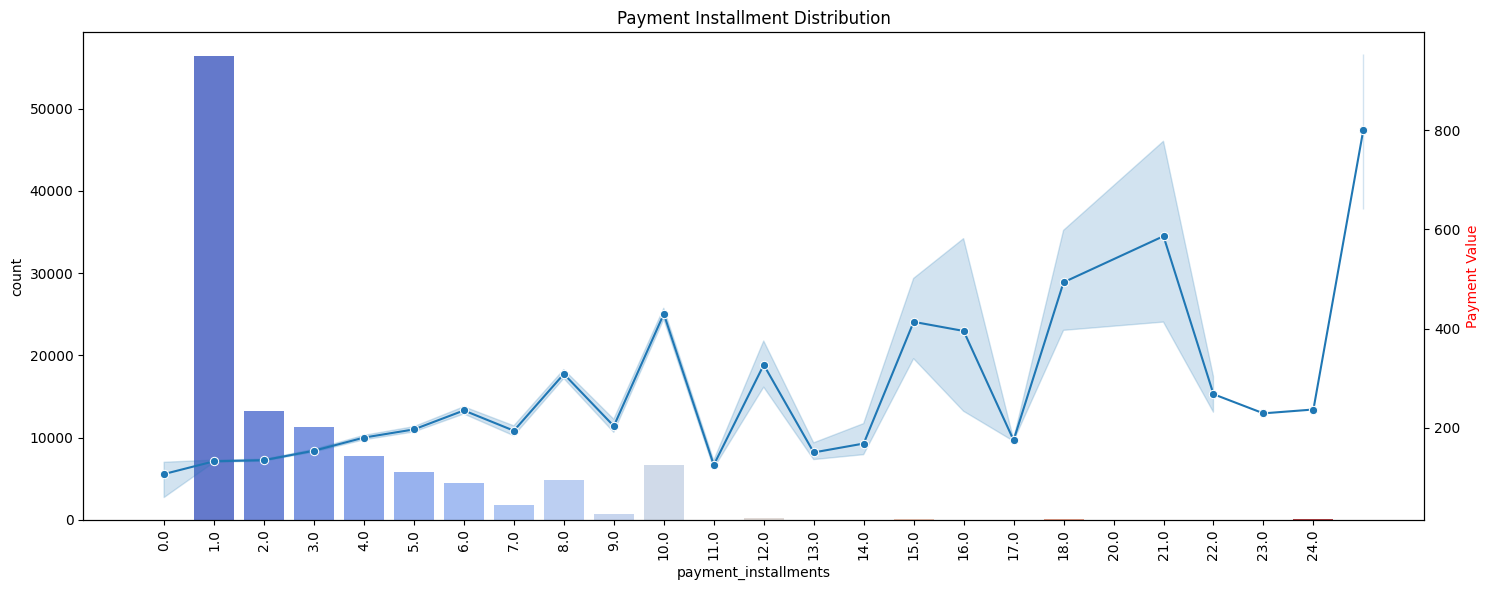

In [103]:
plt.figure(figsize=(15, 6))
sns.countplot(x='payment_installments',data=populer_product_by_month,palette='coolwarm')
plt.xticks(rotation=90)

plt.twinx()
sns.lineplot(x='payment_installments',y='payment_value',data=populer_product_by_month,marker='o')
plt.title('Payment Installment Distribution')
plt.xlabel('Payment Installments')
plt.ylabel('Customer Count', color='blue')
plt.ylabel('Payment Value', color='red')
plt.tight_layout()
plt.show()

**Insights from above chart:**
- The countplot shows the distribution of payment installments used by customers. It indicates the frequency of different installment options chosen by customers when making payments.
- The line plot overlaid on the countplot illustrates the relationship between payment installments and the corresponding payment values.
- The plot aids in financial management by highlighting trends in payment installment distribution and payment values. It enables businesses to monitor cash flow, assess revenue streams, and optimize financial planning based on customer payment patterns.

## **Customer satisfaction towards category & product**

### **Which categories (top 10) are maximum rated & minimum rated?**

In [118]:
# Maximum Rated

product_review_data = pd.merge(product_and_order_items_data,order_review_data,on='order_id')

max_review_category = product_review_data.groupby('product_category_name')['review_score'].sum()

max_review_category_sorted = max_review_category.sort_values(ascending=False)

max_review_category_sorted.reset_index().head(10)

,product_category_name,review_score
0,Bed_Bath_Table,43636
1,Health_Beauty,40121
2,Sports_Leisure,35616
3,Furniture_Decor,32716
4,Computers_Accessories,30953
5,Housewares,28235
6,Watches_Gifts,24016
7,Telephony,17907
8,Garden_Tools,17572
9,Auto,17193


**Insighst from above Table:**
- Categories with higher review scores, such as "Bed_Bath_Table" and "Health_Beauty," may be popular among customers and tend to receive positive feedback.
- Categories with lower review scores, such as "Telephony" and "Auto," may indicate potential issues or challenges faced by customers. Analyzing the reasons behind lower satisfaction levels can help identify areas for improvement in product quality, customer service, or other aspects of the shopping experience.
- Customers may prioritize factors like durability, functionality, or design in certain categories, influencing their satisfaction levels and review scores.

In [75]:
# Minimum Rated

max_review_category_sorted = max_review_category.sort_values(ascending=True)

max_review_category_sorted.reset_index().head(10)

,product_category_name,review_score
0,Security_And_Services,5
1,Fashion_Childrens_Clothes,36
2,La_Cuisine,53
3,Cds_Dvds_Musicals,65
4,Arts_And_Craftmanship,99
5,Home_Comfort_2,101
6,Diapers_And_Hygiene,127
7,Fashion_Sport,132
8,Flowers,139
9,Furniture_Mattress_And_Upholstery,145


### **Average rating by location, seller, product, category, month etc**

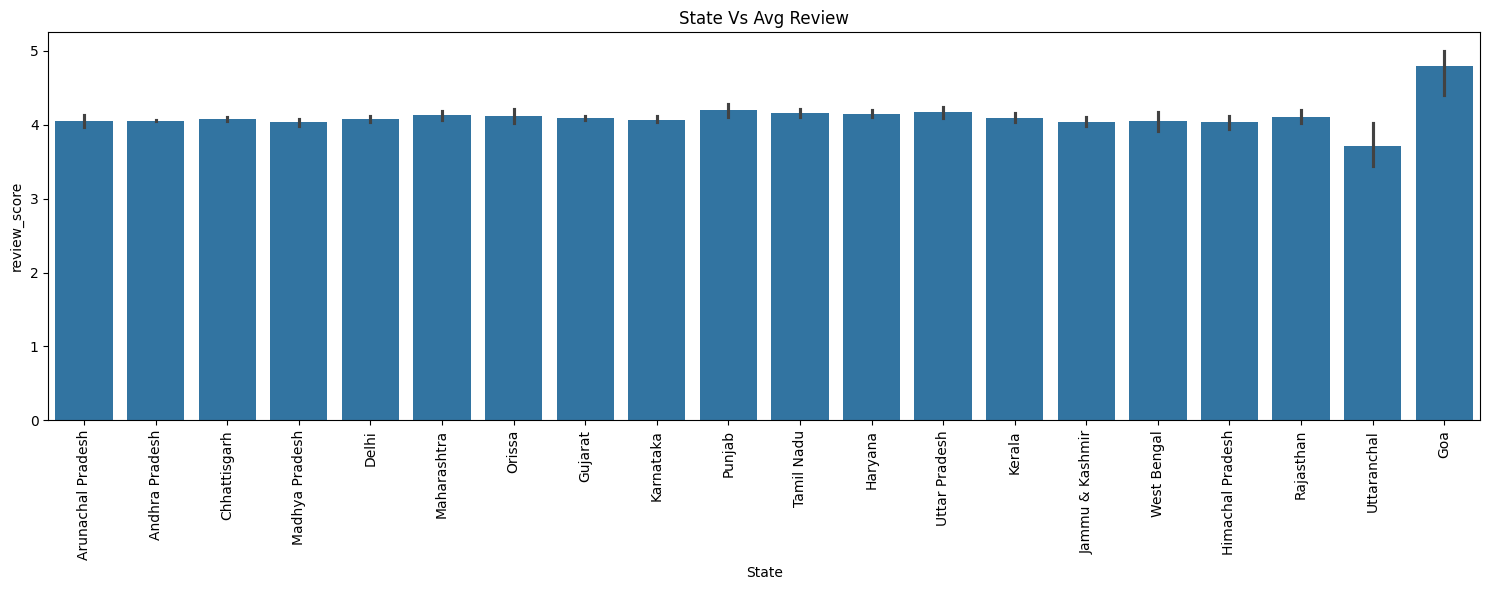

In [119]:
product_review_location_data = pd.merge(product_review_data,customer_payment_location_data,on='order_id')

product_review_location_data.head()

# Average Rating By Location

State_Rating = product_review_location_data.groupby('customer_state')['review_score'].mean().reset_index()

State_Rating

plt.figure(figsize=(15, 6))
sns.barplot(x='customer_state',y='review_score',data=product_review_location_data)
plt.xticks(rotation=90)

plt.title('State Vs Avg Review')
plt.xlabel('State')
plt.ylabel('review_score')
plt.tight_layout()
plt.show()

**Insights from above Table:**
- Goa, Punjab, Tamil Nadu, and Uttar Pradesh, may indicate a higher level of customer satisfaction with products or services provided by the marketplace.
- States with lower average review scores, such as Uttaranchal, may present opportunities for targeted interventions to address customer concerns and improve satisfaction levels.
- The average review scores can be compared to industry benchmarks or internal standards to evaluate performance and competitiveness. States with significantly lower or higher review scores than the overall average may warrant further investigation to understand the underlying factors driving customer satisfaction or dissatisfaction.

In [77]:
# Average Rating by Product

Product_Rating = product_review_location_data.groupby('product_id')['review_score'].mean().reset_index()

Product_Rating.head(10)

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.000000
1,00088930e925c41fd95ebfe695fd2655,4.000000
2,0009406fd7479715e4bef61dd91f2462,1.000000
3,000b8f95fcb9e0096488278317764d19,5.000000
4,000d9be29b5207b54e86aa1b1ac54872,5.000000
5,0011c512eb256aa0dbbb544d8dffcf6e,1.000000
6,00126f27c813603687e6ce486d909d01,5.000000
7,001795ec6f1b187d37335e1c4704762e,3.222222
8,001b237c0e9bb435f2e54071129237e9,5.000000
9,001b72dfd63e9833e8c02742adf472e3,3.692308


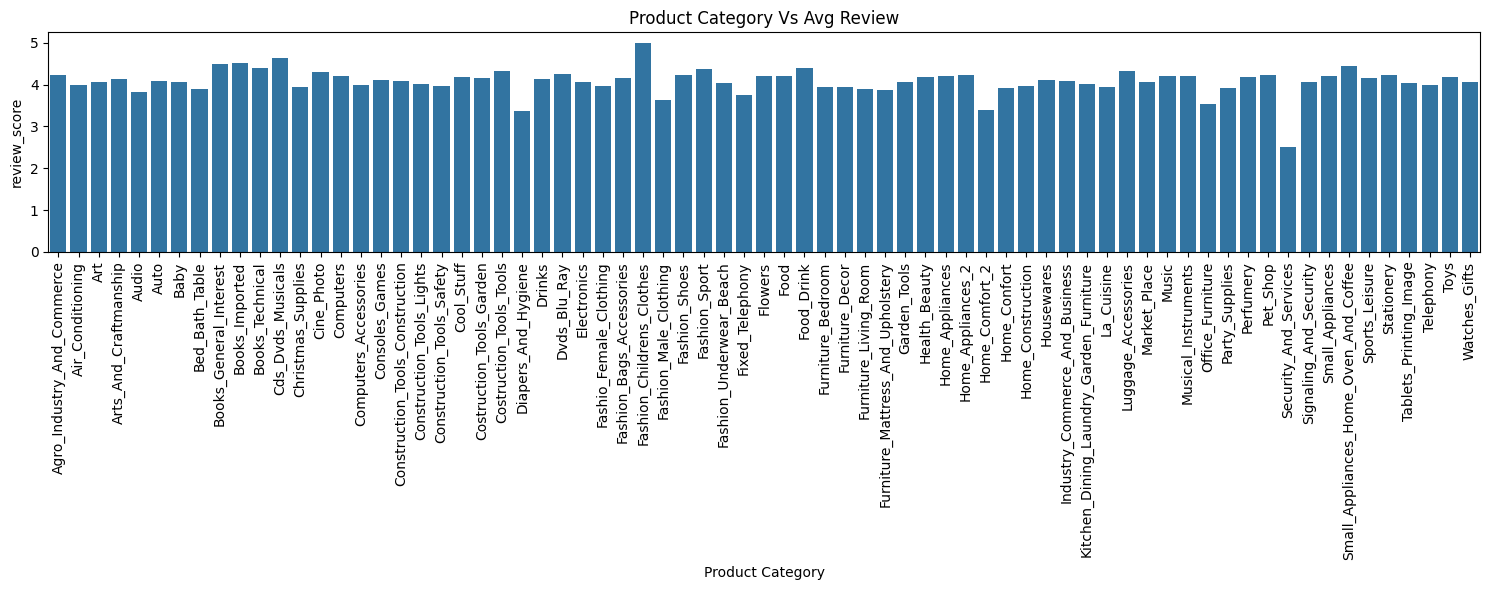

In [111]:
# Average Rating by Product_Category

Product_Category_Rating = product_review_location_data.groupby('product_category_name')['review_score'].mean().reset_index()

Product_Category_Rating.head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x='product_category_name',y='review_score',data=Product_Category_Rating)
plt.xticks(rotation=90)

plt.title('Product Category Vs Avg Review')
plt.xlabel('Product Category')
plt.ylabel('review_score')
plt.tight_layout()
plt.show()

**Insights from above Chart:**
- The bar plot displays the average review score for each product category. It allows for a quick comparison of customer satisfaction levels across different product categories.
- Categories with consistently high average review scores may indicate popular or well-received product lines.Categories with lower average review scores may require further investigation to identify underlying issues affecting customer satisfaction.

In [79]:
# Average Rating For Seller

Seller_Rating = product_review_location_data.groupby('seller_id')['review_score'].mean().reset_index()

Seller_Rating.head(10)

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.944915
2,002100f778ceb8431b7a1020ff7ab48f,4.086207
3,004c9cd9d87a3c30c522c48c4fc07416,4.143713
4,00720abe85ba0859807595bbf045a33b,3.653846
5,00ab3eff1b5192e5f1a63bcecfee11c8,5.000000
6,00d8b143d12632bad99c0ad66ad52825,5.000000
7,00ee68308b45bc5e2660cd833c3f81cc,4.296296
8,00fc707aaaad2d31347cf883cd2dfe10,3.720280
9,010543a62bd80aa422851e79a3bc7540,4.500000


In [80]:
# Average Rating by Month

Month_Year_Rating = product_review_location_data.groupby('Order_Month_year')['review_score'].mean().reset_index()

Month_Year_Rating

,Order_Month_year,review_score
0,2016-09,1.000000
1,2016-10,3.873874
2,2016-12,5.000000
3,2017-01,4.188406
4,2017-02,4.171744
5,2017-03,4.120303
6,2017-04,4.090668
7,2017-05,4.183460
8,2017-06,4.176487
9,2017-07,4.157055


# **Thank You**